# ***EDA Project***

# **Project Name - Tourism**

**Meet Joshi**

# **Step1 : Importing the Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# **Step2 : Reading datasets**

In [3]:
#Reading the dataset using pandas read_csv
df1 = pd.read_csv('https://raw.githubusercontent.com/spidermanMJ17/Data_Analysis_Project/refs/heads/main/tourism_table_26.csv')
#display first 5 rows...
df1.head()

,Category,Nationality,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,North America,Canada,88600.0,93598.0,107671.0,135884.0,157643.0,176567.0,208214.0,222364.0,224069.0,242372.0,259017.0,256021.0,255222.0,268485.0,281306.0,317239.0
1,North America,U.S.A.,329147.0,348182.0,410803.0,526120.0,611165.0,696739.0,799062.0,804933.0,827140.0,931292.0,980688.0,1039947.0,1085309.0,1118983.0,1213624.0,1296939.0
2,North America,Others,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,North America,Total,417747.0,441780.0,518474.0,662004.0,768808.0,873306.0,1007276.0,1027297.0,1051209.0,1173664.0,1239705.0,1295968.0,1340531.0,1387468.0,1494930.0,1614178.0
4,Central And South America,Argentina,2906.0,1359.0,1805.0,2799.0,3313.0,4493.0,4992.0,5087.0,6011.0,7626.0,9391.0,9831.0,10325.0,9731.0,9351.0,12308.0


In [4]:
#Reading the dataset using pandas read_csv
df2 = pd.read_csv('https://raw.githubusercontent.com/spidermanMJ17/Data_Analysis_Project/refs/heads/main/India-Tourism-Statistics-2022-Table.csv')
#display first 5 rows...
df2.head()

,Region,Country of Nationality,Number of Arrivals-2017,Number of Arrivals-2018,Number of Arrivals-2019,Number of Arrivals-2020,Number of Arrivals-2021,Percentage Share - 2018/17,Percentage Share - 2019/18,Percentage Share - 2020/19,Percentage Change - 2021/20,Percentage Change - 2021
0,North America,Canada,335439.0,351040.0,351859,122868.0,80437,4.7,0.2,-65.1,-34.5,5.27
1,North America,U. S. A,1376919.0,1456678.0,1512032,394092.0,429860,5.8,3.8,-73.9,9.1,28.15
2,North America,Others,NaN,NaN,1,NaN,2,NaN,NaN,NaN,NaN,NaN
3,North America,Total,1712358.0,1807718.0,1863892,516960.0,510299,5.6,3.1,-72.3,-1.3,33.42
4,Central and South America,Argentina,14875.0,16345.0,12844,4294.0,530,9.9,-21.4,-66.6,-87.7,0.03


# **Step3 : Data Pre-Processing and Analysing**




In [5]:
#Droping the coluns that doesn't required for our analysis
columns_to_drop = [
    "Percentage Share  - 2018/17",
    "Percentage Share  - 2019/18",
    "Percentage Share  - 2020/19",
    "Percentage Change - 2021/20",
    "Percentage Change - 2021"
]

df2 = df2.drop(columns=columns_to_drop)

In [6]:
#Renaming columns for proper interpretation
df2['Country of Nationality'] = df2['Country of Nationality'].replace('U. S. A', 'U.S.A.')
df2['Region'] = df2['Region'].replace('Central and South America', 'Central And South America')
df2['Country of Nationality'] = df2['Country of Nationality'].replace('Not Classified elsewhere', 'Others')
df2['Region'] = df2['Region'].replace('Not Classified elsewhere', 'Others')

In [7]:
#display first 5 rows...
df2.head()

,Region,Country of Nationality,Number of Arrivals-2017,Number of Arrivals-2018,Number of Arrivals-2019,Number of Arrivals-2020,Number of Arrivals-2021
0,North America,Canada,335439.0,351040.0,351859,122868.0,80437
1,North America,U.S.A.,1376919.0,1456678.0,1512032,394092.0,429860
2,North America,Others,NaN,NaN,1,NaN,2
3,North America,Total,1712358.0,1807718.0,1863892,516960.0,510299
4,Central And South America,Argentina,14875.0,16345.0,12844,4294.0,530


In [8]:
#Merging df1 and df2 to make our dataset having FTA values from 2001 to 2021...
result_df = pd.merge(
    df1,
    df2,
    left_on=['Category', 'Nationality'],
    right_on=['Region', 'Country of Nationality'],
    how='left'
)
result_df.head()

,Category,Nationality,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,Region,Country of Nationality,Number of Arrivals-2017,Number of Arrivals-2018,Number of Arrivals-2019,Number of Arrivals-2020,Number of Arrivals-2021
0,North America,Canada,88600.0,93598.0,107671.0,135884.0,157643.0,176567.0,208214.0,222364.0,...,268485.0,281306.0,317239.0,North America,Canada,335439.0,351040.0,351859.0,122868.0,80437.0
1,North America,U.S.A.,329147.0,348182.0,410803.0,526120.0,611165.0,696739.0,799062.0,804933.0,...,1118983.0,1213624.0,1296939.0,North America,U.S.A.,1376919.0,1456678.0,1512032.0,394092.0,429860.0
2,North America,Others,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,North America,Others,NaN,NaN,1.0,NaN,2.0
3,North America,Total,417747.0,441780.0,518474.0,662004.0,768808.0,873306.0,1007276.0,1027297.0,...,1387468.0,1494930.0,1614178.0,North America,Total,1712358.0,1807718.0,1863892.0,516960.0,510299.0
4,Central And South America,Argentina,2906.0,1359.0,1805.0,2799.0,3313.0,4493.0,4992.0,5087.0,...,9731.0,9351.0,12308.0,Central And South America,Argentina,14875.0,16345.0,12844.0,4294.0,530.0


In [12]:
#saving this result_df to .csv using pandas...
import os

os.makedirs("/content/drive/MyDrive/Colab Notebooks/EDA_Tourism_ALL_datasets", exist_ok=True)

result_df.to_csv('/content/drive/MyDrive/Colab Notebooks/EDA_Tourism_ALL_datasets/Final_FTA_2001to2023.csv', index=False)

In [13]:
#renaming the columns of year to FTA - Year to make in proper readable format...
result_df.rename(columns={'2001': 'FTA - 2001', '2002': 'FTA - 2002', '2003': 'FTA - 2003', '2004': 'FTA - 2004', '2005': 'FTA - 2005', '2006': 'FTA - 2006', '2007': 'FTA - 2007', '2008': 'FTA - 2008', '2009': 'FTA - 2009', '2010': 'FTA - 2010'}, inplace=True)

In [14]:
#renaming the columns of year to FTA - Year to make in proper readable format...
result_df.rename(columns={'2011': 'FTA - 2011', '2012': 'FTA - 2012', '2013': 'FTA - 2013', '2014': 'FTA - 2014', '2015': 'FTA - 2015', '2016': 'FTA - 2016'}, inplace=True)

In [15]:
#renaming the columns of year to FTA - Year to make in proper readable format...
result_df.rename(columns={'Number of Arrivals-2017': 'FTA - 2017', 'Number of Arrivals-2018': 'FTA - 2018', 'Number of Arrivals-2019': 'FTA - 2019', 'Number of Arrivals-2020': 'FTA - 2020', 'Number of Arrivals-2021': 'FTA - 2021'}, inplace=True)

In [16]:
#droping this columns as we have twice this columns...
result_df.drop(columns=['Region', 'Country of Nationality'], inplace=True)

In [17]:
#display rows of result_df...
result_df.head()

,Category,Nationality,FTA - 2001,FTA - 2002,FTA - 2003,FTA - 2004,FTA - 2005,FTA - 2006,FTA - 2007,FTA - 2008,...,FTA - 2012,FTA - 2013,FTA - 2014,FTA - 2015,FTA - 2016,FTA - 2017,FTA - 2018,FTA - 2019,FTA - 2020,FTA - 2021
0,North America,Canada,88600.0,93598.0,107671.0,135884.0,157643.0,176567.0,208214.0,222364.0,...,256021.0,255222.0,268485.0,281306.0,317239.0,335439.0,351040.0,351859.0,122868.0,80437.0
1,North America,U.S.A.,329147.0,348182.0,410803.0,526120.0,611165.0,696739.0,799062.0,804933.0,...,1039947.0,1085309.0,1118983.0,1213624.0,1296939.0,1376919.0,1456678.0,1512032.0,394092.0,429860.0
2,North America,Others,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0
3,North America,Total,417747.0,441780.0,518474.0,662004.0,768808.0,873306.0,1007276.0,1027297.0,...,1295968.0,1340531.0,1387468.0,1494930.0,1614178.0,1712358.0,1807718.0,1863892.0,516960.0,510299.0
4,Central And South America,Argentina,2906.0,1359.0,1805.0,2799.0,3313.0,4493.0,4992.0,5087.0,...,9831.0,10325.0,9731.0,9351.0,12308.0,14875.0,16345.0,12844.0,4294.0,530.0


In [18]:
#make a copy of result_df so that our changes doesn't reflect in original data
df = result_df.copy()

In [19]:
#Use the info() function to get an overview of the dataset, including data types and non-null counts.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Category     89 non-null     object 
 1   Nationality  89 non-null     object 
 2   FTA - 2001   88 non-null     float64
 3   FTA - 2002   88 non-null     float64
 4   FTA - 2003   88 non-null     float64
 5   FTA - 2004   88 non-null     float64
 6   FTA - 2005   88 non-null     float64
 7   FTA - 2006   88 non-null     float64
 8   FTA - 2007   88 non-null     float64
 9   FTA - 2008   88 non-null     float64
 10  FTA - 2009   88 non-null     float64
 11  FTA - 2010   88 non-null     float64
 12  FTA - 2011   88 non-null     float64
 13  FTA - 2012   88 non-null     float64
 14  FTA - 2013   88 non-null     float64
 15  FTA - 2014   88 non-null     float64
 16  FTA - 2015   88 non-null     float64
 17  FTA - 2016   87 non-null     float64
 18  FTA - 2017   71 non-null     float64
 19  FTA - 2018

In [20]:
# Check for missing values
df.isnull().sum()

,0
Category,0
Nationality,0
FTA - 2001,1
FTA - 2002,1
FTA - 2003,1
FTA - 2004,1
FTA - 2005,1
FTA - 2006,1
FTA - 2007,1
FTA - 2008,1


In [21]:
#Display the summary statistics for numerical columns using describe().
df.describe()

,FTA - 2001,FTA - 2002,FTA - 2003,FTA - 2004,FTA - 2005,FTA - 2006,FTA - 2007,FTA - 2008,FTA - 2009,FTA - 2010,...,FTA - 2012,FTA - 2013,FTA - 2014,FTA - 2015,FTA - 2016,FTA - 2017,FTA - 2018,FTA - 2019,FTA - 2020,FTA - 2021
count,8.800000e+01,8.800000e+01,8.800000e+01,8.800000e+01,8.800000e+01,8.800000e+01,8.800000e+01,8.800000e+01,8.800000e+01,8.800000e+01,...,8.800000e+01,8.800000e+01,8.800000e+01,8.800000e+01,8.700000e+01,7.100000e+01,7.100000e+01,7.200000e+01,7.100000e+01,7.200000e+01
mean,8.601289e+04,8.103249e+04,9.263386e+04,1.176772e+05,1.331874e+05,1.513002e+05,1.725404e+05,1.796524e+05,1.759522e+05,1.967130e+05,...,2.241577e+05,2.372667e+05,2.614390e+05,2.733732e+05,3.033343e+05,4.091538e+05,4.310943e+05,4.403971e+05,1.114809e+05,6.245040e+04
std,2.970047e+05,2.796281e+05,3.184832e+05,4.031541e+05,4.558909e+05,5.173263e+05,5.888781e+05,6.104692e+05,5.966520e+05,6.622224e+05,...,7.489095e+05,7.897710e+05,8.718256e+05,9.157697e+05,1.011168e+06,1.282466e+06,1.349119e+06,1.394970e+06,3.505048e+05,2.015686e+05
min,8.500000e+01,5.400000e+01,5.700000e+01,5.710000e+02,1.140000e+02,1.620000e+02,2.380000e+02,2.320000e+02,2.730000e+02,4.950000e+02,...,6.960000e+02,1.660000e+02,8.600000e+01,1.050000e+02,1.410000e+02,5.219000e+03,5.478000e+03,1.000000e+00,1.636000e+03,2.000000e+00
25%,3.459000e+03,3.317250e+03,3.963750e+03,4.555250e+03,5.705250e+03,7.010500e+03,7.969250e+03,1.078325e+04,1.021475e+04,1.185875e+04,...,1.519900e+04,1.778800e+04,1.926525e+04,1.960975e+04,2.070950e+04,2.771750e+04,3.237750e+04,3.129350e+04,8.172000e+03,2.438000e+03
50%,1.378000e+04,1.128600e+04,1.279250e+04,1.611950e+04,2.002000e+04,2.222600e+04,2.646450e+04,2.924200e+04,2.692700e+04,3.472300e+04,...,3.875100e+04,4.064250e+04,4.409400e+04,4.565500e+04,5.091700e+04,5.659700e+04,5.861300e+04,5.590300e+04,1.423200e+04,6.630500e+03
75%,4.160525e+04,3.800900e+04,4.380525e+04,6.275225e+04,7.615325e+04,8.778300e+04,1.071545e+05,1.023368e+05,1.024142e+05,1.164765e+05,...,1.408270e+05,1.509468e+05,1.583032e+05,1.676205e+05,1.862675e+05,2.484275e+05,2.678700e+05,2.516718e+05,6.063600e+04,3.248850e+04
max,2.537282e+06,2.384364e+06,2.726213e+06,3.456698e+06,3.918610e+06,4.447167e+06,5.081504e+06,5.282603e+06,5.167699e+06,5.775692e+06,...,6.577745e+06,6.967601e+06,7.679099e+06,8.027133e+06,8.804411e+06,1.003580e+07,1.055798e+07,1.093036e+07,2.744766e+06,1.527114e+06


In [22]:
#Give no. of columns and rows in the dataset.
df.shape

(89, 23)

# **Step4 : Data cleaning**

Handling Missing value and Missing value Imputation




In [23]:
#used for missing data interpretation
import missingno as msno

As in some of the rows, we have many NULL values of FTA so we remove some of the rows having NULL values as we cannot fill values of FTA ranging from 2001 to 2021 as in row of category = America and Nationality = Others , we have many NULL values of FTA. So we removed it.

In [24]:
#drop row with index = 2
df.drop(index = 2, inplace=True)

Here row having index = 86, we have that row as FTA values of Others as both category and nationality so, in our data analysis we dont require to know FTA values of nationalities that we dont know. It does not affect our analysis.

In [25]:
#drop row with index = 86
df.drop(index = 86, inplace=True)

In [26]:
# Check for missing values
df.isnull().sum()

,0
Category,0
Nationality,0
FTA - 2001,0
FTA - 2002,0
FTA - 2003,0
FTA - 2004,0
FTA - 2005,0
FTA - 2006,0
FTA - 2007,0
FTA - 2008,0


In [27]:
#display top 5 rows...
df.head()

,Category,Nationality,FTA - 2001,FTA - 2002,FTA - 2003,FTA - 2004,FTA - 2005,FTA - 2006,FTA - 2007,FTA - 2008,...,FTA - 2012,FTA - 2013,FTA - 2014,FTA - 2015,FTA - 2016,FTA - 2017,FTA - 2018,FTA - 2019,FTA - 2020,FTA - 2021
0,North America,Canada,88600.0,93598.0,107671.0,135884.0,157643.0,176567.0,208214.0,222364.0,...,256021.0,255222.0,268485.0,281306.0,317239.0,335439.0,351040.0,351859.0,122868.0,80437.0
1,North America,U.S.A.,329147.0,348182.0,410803.0,526120.0,611165.0,696739.0,799062.0,804933.0,...,1039947.0,1085309.0,1118983.0,1213624.0,1296939.0,1376919.0,1456678.0,1512032.0,394092.0,429860.0
3,North America,Total,417747.0,441780.0,518474.0,662004.0,768808.0,873306.0,1007276.0,1027297.0,...,1295968.0,1340531.0,1387468.0,1494930.0,1614178.0,1712358.0,1807718.0,1863892.0,516960.0,510299.0
4,Central And South America,Argentina,2906.0,1359.0,1805.0,2799.0,3313.0,4493.0,4992.0,5087.0,...,9831.0,10325.0,9731.0,9351.0,12308.0,14875.0,16345.0,12844.0,4294.0,530.0
5,Central And South America,Brazil,3819.0,3622.0,4528.0,7397.0,7005.0,9148.0,10788.0,11530.0,...,18440.0,18551.0,19563.0,20610.0,21289.0,24453.0,26579.0,25422.0,8092.0,2055.0


<Axes: >

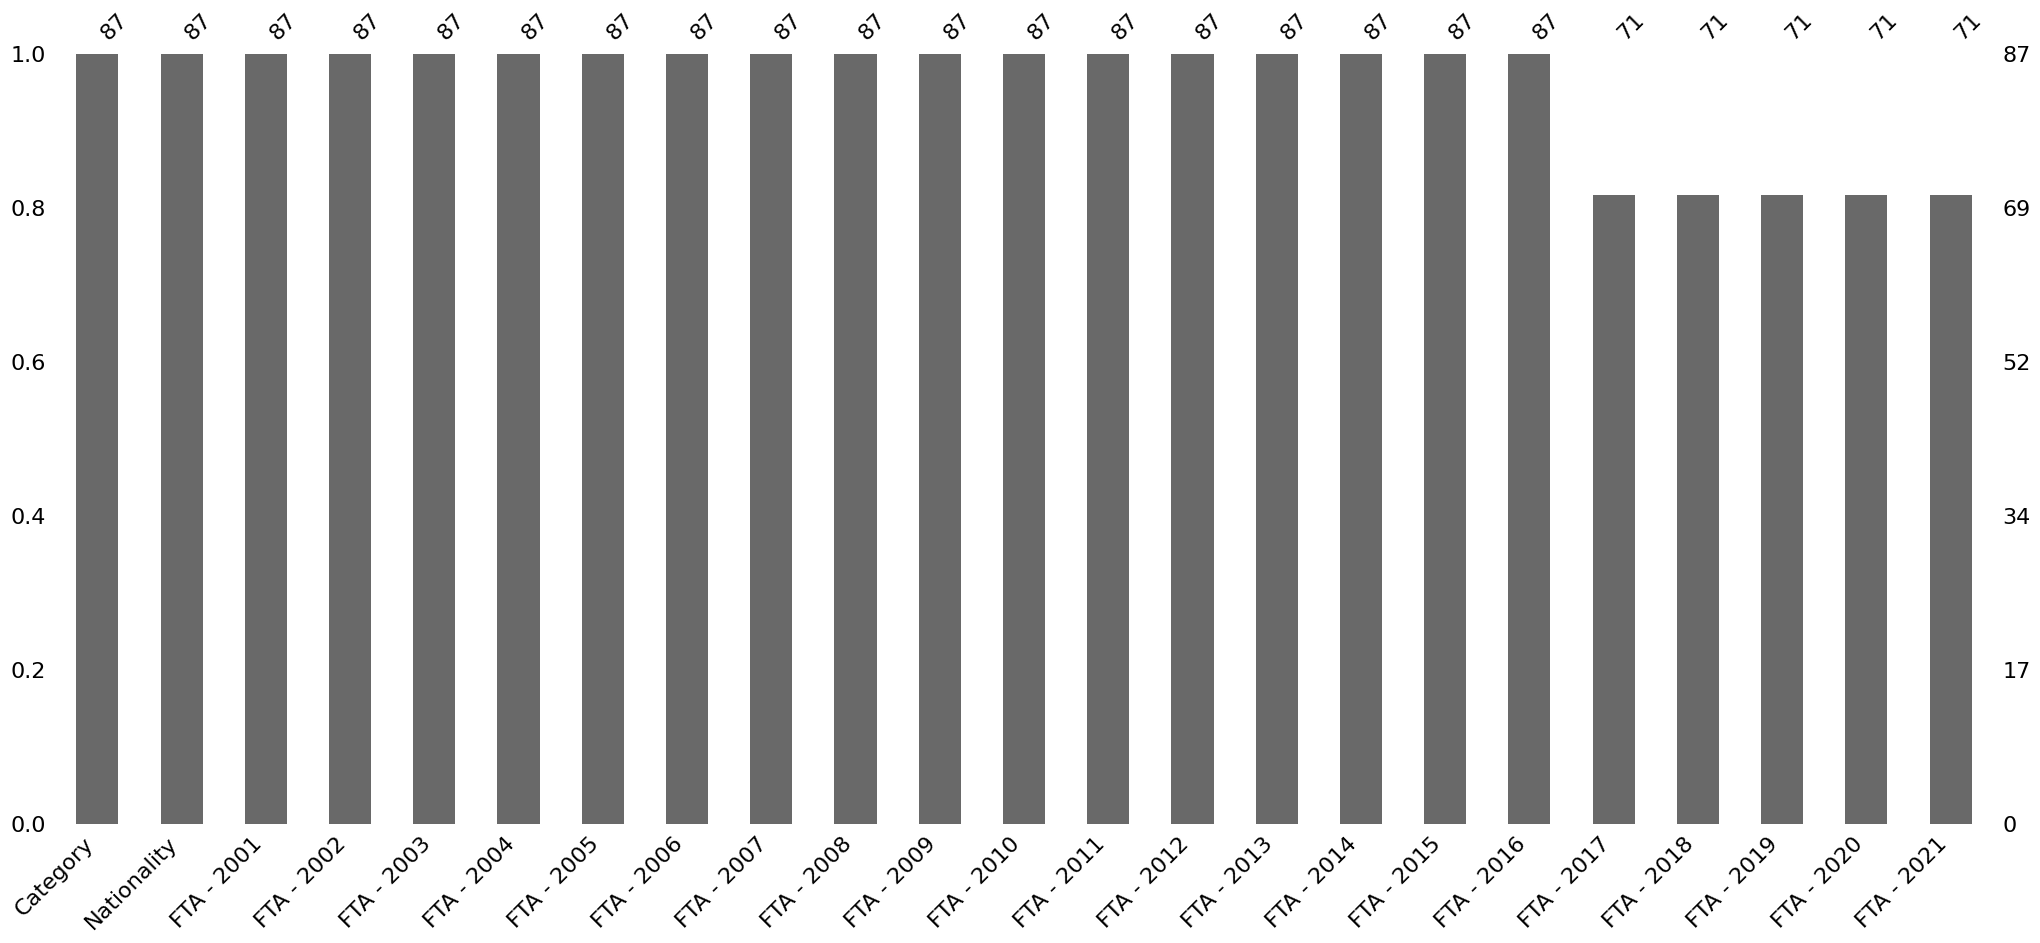

In [28]:
#plotting bar plot of df having missing values
msno.bar(df)

<Axes: >

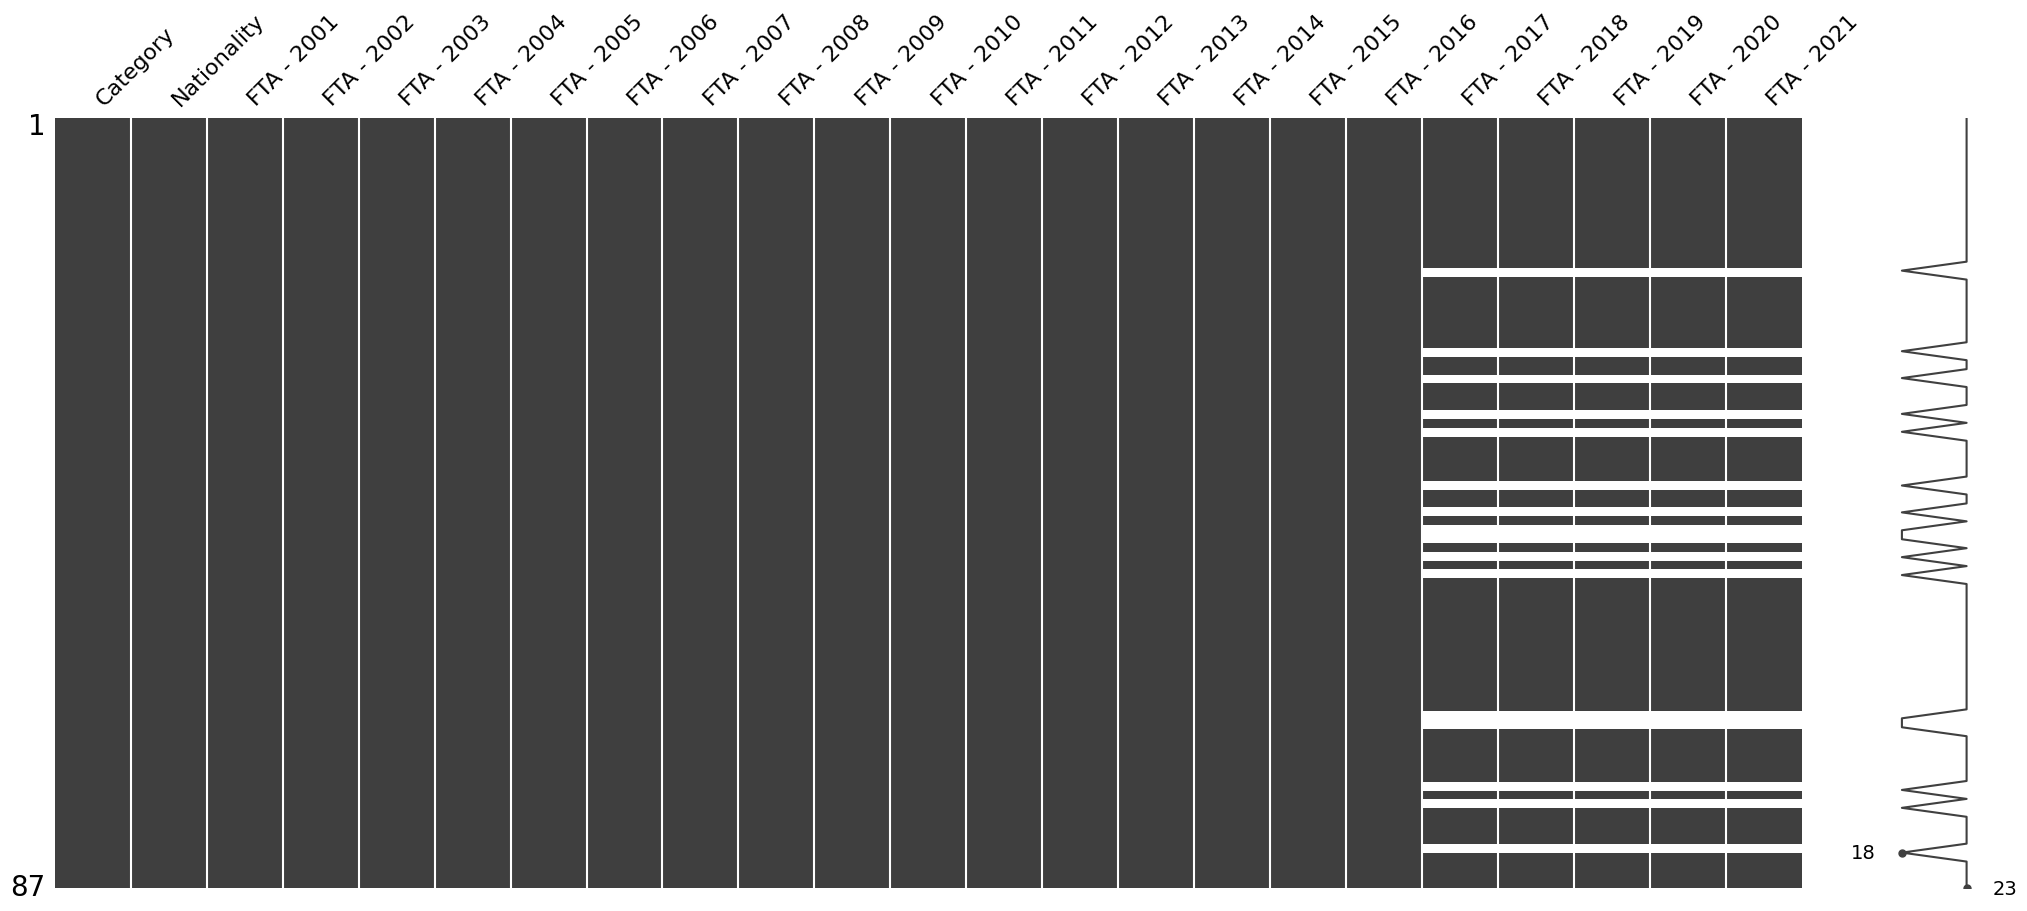

In [29]:
#plotting matrix plot of df having missing values
msno.matrix(df)

<Axes: >

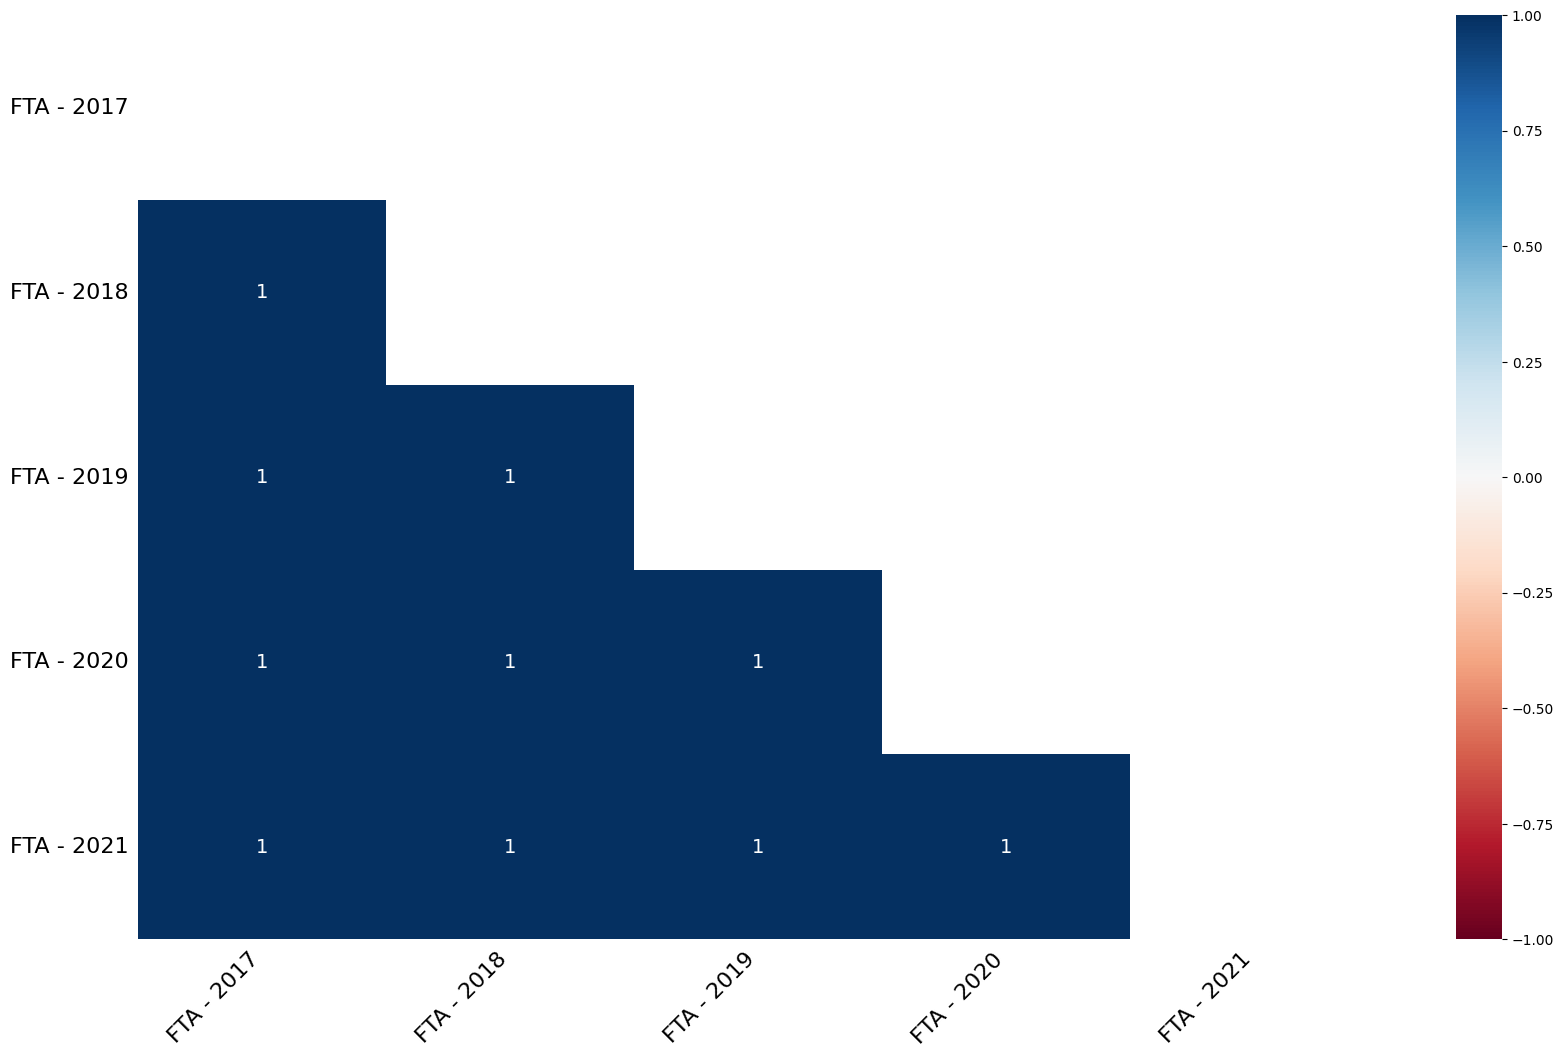

In [30]:
#plotting heatmap of df having missing values
msno.heatmap(df)

<Axes: >

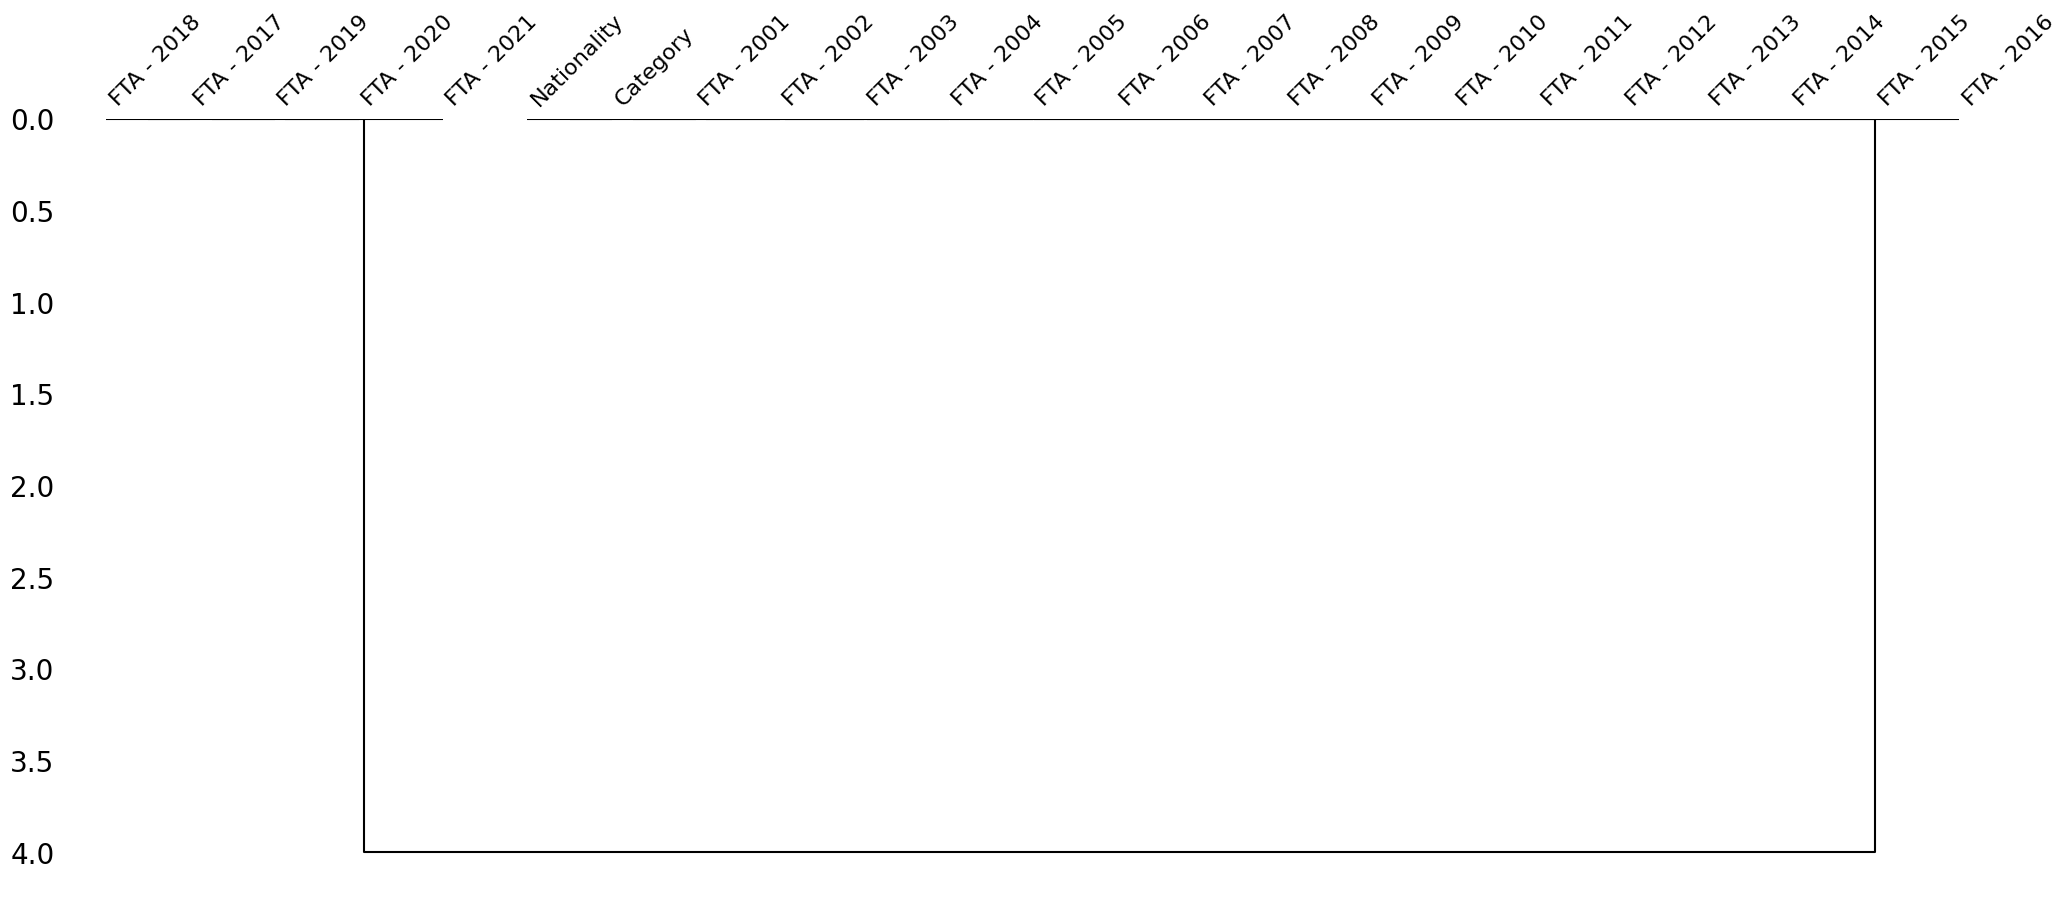

In [31]:
#plotting dendogram of df having missing values
msno.dendrogram(df)

Now I am performing test to see whether my data is MCAR, MAR or NMAR. First I perfrom Little's MCAR test. So if it comes true then my dataset is MCAR.

In [32]:
from scipy.stats import chi2_contingency

# Creating a missingness indicator (1 for missing, 0 for not missing)
missing_indicator = df.iloc[:, 2:].isnull().astype(int)

# Now let's create the observed data, which will be the data where values are not missing
observed_data = df.iloc[:, 2:].notnull().astype(int)

# Creating a contingency table (observed vs. missing data)
contingency_table = pd.concat([observed_data.sum(axis=1), missing_indicator.sum(axis=1)], axis=1)
contingency_table.columns = ['Observed', 'Missing']


# Checking for rows with zero observed or missing values and remove them
contingency_table = contingency_table[
    (contingency_table['Observed'] != 0) & (contingency_table['Missing'] != 0)
]

# Performing Chi-Square Test for MCAR hypothesis if contingency table is not empty
if not contingency_table.empty:
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Check the result
    print("Chi-Square Test Result:")
    print(f"Chi-Square Value: {chi2}")
    print(f"P-Value: {p}")

    # If p-value is greater than 0.05, we fail to reject the null hypothesis (MCAR)
    if p > 0.05:
        print("The missing data is likely MCAR.")
    else:
        print("The missing data is not MCAR.")
else:
    print("Contingency table is empty after removing rows with zero values. Cannot perform Chi-Square test.")

Chi-Square Test Result:
Chi-Square Value: 0.0
P-Value: 1.0
The missing data is likely MCAR.


Filling missing values using FTA proportion formula as we have original data for total FTA values in India for year 2017-2023. So using this, we have impute future FTA values of Nationality if a nationality have NULL in this years of FTA data.

In [33]:
#reading dataset having total FTA's for year 2017-2023 and using this values in imputation...
df_fee = pd.read_csv('https://raw.githubusercontent.com/Shravan-0024/EDA_labAssignments/refs/heads/main/fta_data_combined.csv')
#display first 5 rows...
df_fee.tail()

,Year,FTAs in India,Percentage (%) change over previous year,FEE through tourism (in Crores),Fee % Change over previous year,0-14,15-24,25-34,35-44,45-54,55-64,65 and above,Q1 (Jan-Mar),Q2 (Apr-June),Q3 (July-Sep),Q4 (Oct-Dec),Tourism % Share in India,Rank of India
18,2019,10930000,3.500000,211661,8.6,9.2,8.3,18.6,21.3,19.8,14.1,8.8,29.1,19.4,21.7,29.9,1.23,23rd
19,2020,2740000,-74.900000,50136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.58,34th
20,2021,1520000,-44.525547,65070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.23,39th
21,2022,6440000,323.684211,134543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,2023,9240000,43.478261,2345210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# FTA total for each year using df_fee
total_fta = {
    2017: 10040000,
    2018: 10560000,
    2019: 10930000,
    2020: 2740000,
    2021: 1520000
}

# Fill missing values year by year
for year in range(2017, 2022):
    col_name = f'FTA - {year}'

    # Sum of FTA values for the current year (non-missing rows only)
    non_missing_total = df[col_name].sum()

    # Calculate the proportion of the total for countries with missing values
    missing_rows = df[col_name].isna()
    proportion = total_fta[year] / non_missing_total if non_missing_total > 0 else 0

    # Fill missing values using proportion
    df.loc[missing_rows, col_name] = (
        df.loc[missing_rows, f'FTA - {year - 1}'] * proportion
    )

# Display the filled DataFrame for first 5 rows...
df.head()

,Category,Nationality,FTA - 2001,FTA - 2002,FTA - 2003,FTA - 2004,FTA - 2005,FTA - 2006,FTA - 2007,FTA - 2008,...,FTA - 2012,FTA - 2013,FTA - 2014,FTA - 2015,FTA - 2016,FTA - 2017,FTA - 2018,FTA - 2019,FTA - 2020,FTA - 2021
0,North America,Canada,88600.0,93598.0,107671.0,135884.0,157643.0,176567.0,208214.0,222364.0,...,256021.0,255222.0,268485.0,281306.0,317239.0,335439.0,351040.0,351859.0,122868.0,80437.0
1,North America,U.S.A.,329147.0,348182.0,410803.0,526120.0,611165.0,696739.0,799062.0,804933.0,...,1039947.0,1085309.0,1118983.0,1213624.0,1296939.0,1376919.0,1456678.0,1512032.0,394092.0,429860.0
3,North America,Total,417747.0,441780.0,518474.0,662004.0,768808.0,873306.0,1007276.0,1027297.0,...,1295968.0,1340531.0,1387468.0,1494930.0,1614178.0,1712358.0,1807718.0,1863892.0,516960.0,510299.0
4,Central And South America,Argentina,2906.0,1359.0,1805.0,2799.0,3313.0,4493.0,4992.0,5087.0,...,9831.0,10325.0,9731.0,9351.0,12308.0,14875.0,16345.0,12844.0,4294.0,530.0
5,Central And South America,Brazil,3819.0,3622.0,4528.0,7397.0,7005.0,9148.0,10788.0,11530.0,...,18440.0,18551.0,19563.0,20610.0,21289.0,24453.0,26579.0,25422.0,8092.0,2055.0


In [35]:
# Total FTA values for 2022 and 2023
total_fta = {
    2022: 6440000,
    2023: 9240000
}

# Start by calculating the proportions for 2021
df['Proportion_2021'] = df['FTA - 2021'] / df['FTA - 2021'].sum()

# Generate FTA values year by year, updating proportions dynamically
previous_year = 2021
for year, total in total_fta.items():
    # Calculate proportions based on the previous year's data
    proportion_column = f'Proportion_{previous_year}'
    fta_column_previous = f'FTA - {previous_year}'

    # Add a new column for the current year's FTA
    df[f'FTA - {year}'] = (df[fta_column_previous] / df[fta_column_previous].sum()) * total

    # Update the proportions for the current year
    df[f'Proportion_{year}'] = df[f'FTA - {year}'] / df[f'FTA - {year}'].sum()

    # Update the previous year
    previous_year = year

# Display the updated DataFrame for first 5 rows...
columns_to_display = ['Category', 'Nationality'] + [f'FTA - {year}' for year in range(2016, 2024)]

In [36]:
#display first 5 rows...
df[columns_to_display].head()

,Category,Nationality,FTA - 2016,FTA - 2017,FTA - 2018,FTA - 2019,FTA - 2020,FTA - 2021,FTA - 2022,FTA - 2023
0,North America,Canada,317239.0,335439.0,351040.0,351859.0,122868.0,80437.0,115088.635321,1.651272e+05
1,North America,U.S.A.,1296939.0,1376919.0,1456678.0,1512032.0,394092.0,429860.0,615040.351817,8.824492e+05
3,North America,Total,1614178.0,1712358.0,1807718.0,1863892.0,516960.0,510299.0,730131.848723,1.047580e+06
4,Central And South America,Argentina,12308.0,14875.0,16345.0,12844.0,4294.0,530.0,758.319887,1.088024e+03
5,Central And South America,Brazil,21289.0,24453.0,26579.0,25422.0,8092.0,2055.0,2940.278051,4.218660e+03


In [37]:
#checking for missing values
df.isnull().sum()

,0
Category,0
Nationality,0
FTA - 2001,0
FTA - 2002,0
FTA - 2003,0
FTA - 2004,0
FTA - 2005,0
FTA - 2006,0
FTA - 2007,0
FTA - 2008,0


In [45]:
# Drop rows where 'Nationality' column has the value 'Total' as that we can find from other nationality value
# for a same category
df = df[df['Nationality'] != 'Total']

In [47]:
#droping un-necessary columns
df.drop(columns=['Proportion_2021', 'Proportion_2022', 'Proportion_2023'], inplace=True)

In [48]:
#display first 5 rows...
df.head()

,Category,Nationality,FTA - 2001,FTA - 2002,FTA - 2003,FTA - 2004,FTA - 2005,FTA - 2006,FTA - 2007,FTA - 2008,...,FTA - 2014,FTA - 2015,FTA - 2016,FTA - 2017,FTA - 2018,FTA - 2019,FTA - 2020,FTA - 2021,FTA - 2022,FTA - 2023
0,North America,Canada,88600.0,93598.0,107671.0,135884.0,157643.0,176567.0,208214.0,222364.0,...,268485.0,281306.0,317239.0,335439.0,351040.0,351859.0,122868.0,80437.0,115088.635321,165127.172417
1,North America,U.S.A.,329147.0,348182.0,410803.0,526120.0,611165.0,696739.0,799062.0,804933.0,...,1118983.0,1213624.0,1296939.0,1376919.0,1456678.0,1512032.0,394092.0,429860.0,615040.351817,882449.200434
4,Central And South America,Argentina,2906.0,1359.0,1805.0,2799.0,3313.0,4493.0,4992.0,5087.0,...,9731.0,9351.0,12308.0,14875.0,16345.0,12844.0,4294.0,530.0,758.319887,1088.024185
5,Central And South America,Brazil,3819.0,3622.0,4528.0,7397.0,7005.0,9148.0,10788.0,11530.0,...,19563.0,20610.0,21289.0,24453.0,26579.0,25422.0,8092.0,2055.0,2940.278051,4218.659812
6,Central And South America,Mexico,3473.0,3105.0,3563.0,4570.0,5398.0,6502.0,8299.0,9272.0,...,13978.0,14049.0,15689.0,18114.0,19909.0,20766.0,4580.0,859.0,1229.050533,1763.420330


In [49]:
# Round all float values in the DataFrame to 2 decimal places
df = df.round(2)

In [50]:
#save this df to Cleaned_FTA_2001to2023.csv as this dataset contains FTA values from 2001 to 2023 for each nationalities
#so this df used for further analysis
df.to_csv('/content/drive/MyDrive/Colab Notebooks/EDA_Tourism_ALL_datasets/Cleaned_FTA_2001to2023.csv', index=False)

In [51]:
#make all the categorical string values of Category and Nationality to lower for proper interpretation
df['Nationality'] = df['Nationality'].str.lower()
df['Category'] = df['Category'].str.lower()

In [52]:
#replace all this column names so that no small error introduced due to column name interpretation
df['Nationality'] = df['Nationality'].replace('u.s.a.', 'usa')
df['Nationality'] = df['Nationality'].replace('u.k.', 'uk')
df['Nationality'] = df['Nationality'].replace('u.a.e.', 'uae')

In [53]:
#display first 5 rows...
df.head()

,Category,Nationality,FTA - 2001,FTA - 2002,FTA - 2003,FTA - 2004,FTA - 2005,FTA - 2006,FTA - 2007,FTA - 2008,...,FTA - 2014,FTA - 2015,FTA - 2016,FTA - 2017,FTA - 2018,FTA - 2019,FTA - 2020,FTA - 2021,FTA - 2022,FTA - 2023
0,north america,canada,88600.0,93598.0,107671.0,135884.0,157643.0,176567.0,208214.0,222364.0,...,268485.0,281306.0,317239.0,335439.0,351040.0,351859.0,122868.0,80437.0,115088.64,165127.17
1,north america,usa,329147.0,348182.0,410803.0,526120.0,611165.0,696739.0,799062.0,804933.0,...,1118983.0,1213624.0,1296939.0,1376919.0,1456678.0,1512032.0,394092.0,429860.0,615040.35,882449.20
4,central and south america,argentina,2906.0,1359.0,1805.0,2799.0,3313.0,4493.0,4992.0,5087.0,...,9731.0,9351.0,12308.0,14875.0,16345.0,12844.0,4294.0,530.0,758.32,1088.02
5,central and south america,brazil,3819.0,3622.0,4528.0,7397.0,7005.0,9148.0,10788.0,11530.0,...,19563.0,20610.0,21289.0,24453.0,26579.0,25422.0,8092.0,2055.0,2940.28,4218.66
6,central and south america,mexico,3473.0,3105.0,3563.0,4570.0,5398.0,6502.0,8299.0,9272.0,...,13978.0,14049.0,15689.0,18114.0,19909.0,20766.0,4580.0,859.0,1229.05,1763.42


Here see I have used Total FTA values year wise for imputing the FTA values having NULL in it. So here I have not used linear interpolation and FFill as that will create discrepancies. In linear interpolation, for imputing values it required the null values should have non-null values at either sides otherwise it will be same used as Ffill or Bfill. So as we have only one side non-null value of Null value so here interpolated manually without using any EDA imputation methods.

# **Step5 : Outlier detection**

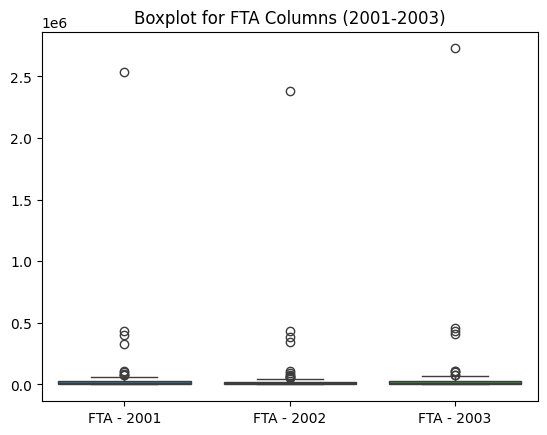

In [54]:
# Boxplot for visualizing outliers in columns
sns.boxplot(data=df[['FTA - 2001', 'FTA - 2002', 'FTA - 2003']])
plt.title("Boxplot for FTA Columns (2001-2003)")
plt.show()

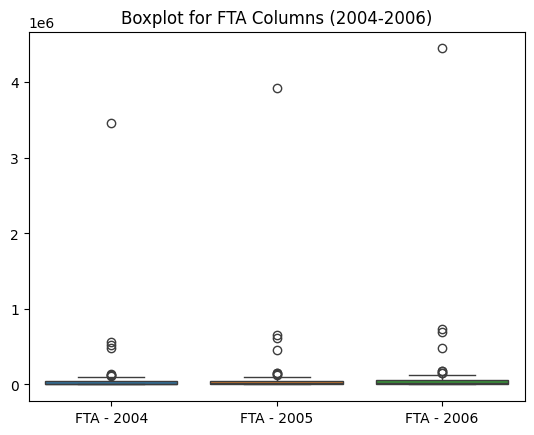

In [55]:
# Boxplot for visualizing outliers in columns
sns.boxplot(data=df[['FTA - 2004', 'FTA - 2005', 'FTA - 2006']])
plt.title("Boxplot for FTA Columns (2004-2006)")
plt.show()

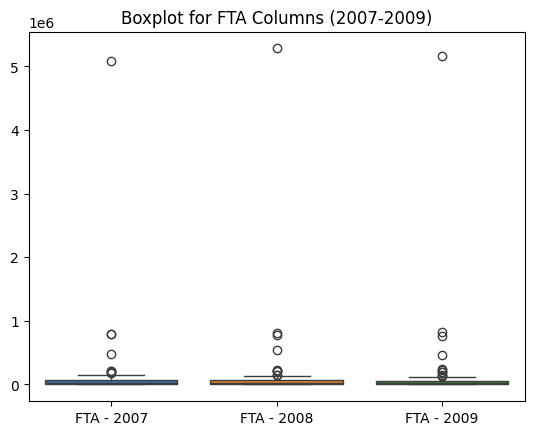

In [56]:
# Boxplot for visualizing outliers in columns
sns.boxplot(data=df[['FTA - 2007', 'FTA - 2008', 'FTA - 2009']])
plt.title("Boxplot for FTA Columns (2007-2009)")
plt.show()

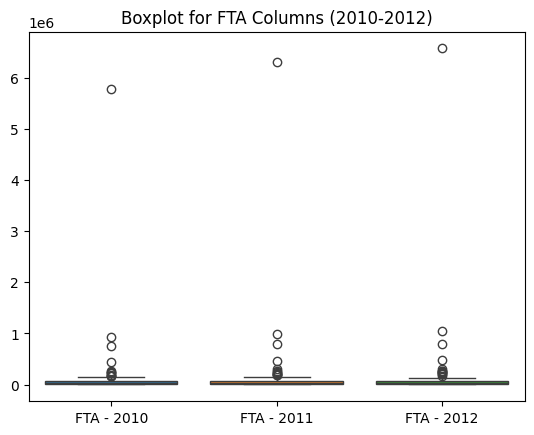

In [57]:
# Boxplot for visualizing outliers in columns
sns.boxplot(data=df[['FTA - 2010', 'FTA - 2011', 'FTA - 2012']])
plt.title("Boxplot for FTA Columns (2010-2012)")
plt.show()

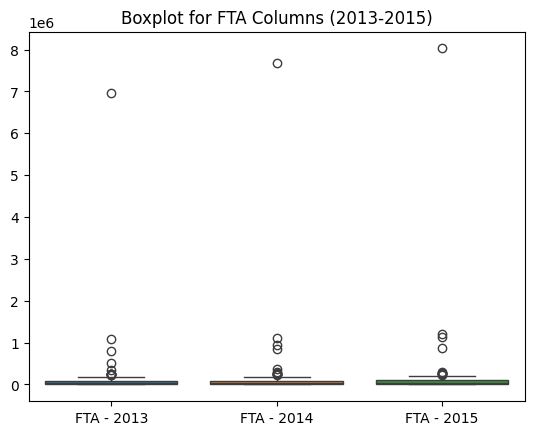

In [58]:
# Boxplot for visualizing outliers in columns
sns.boxplot(data=df[['FTA - 2013', 'FTA - 2014', 'FTA - 2015']])
plt.title("Boxplot for FTA Columns (2013-2015)")
plt.show()

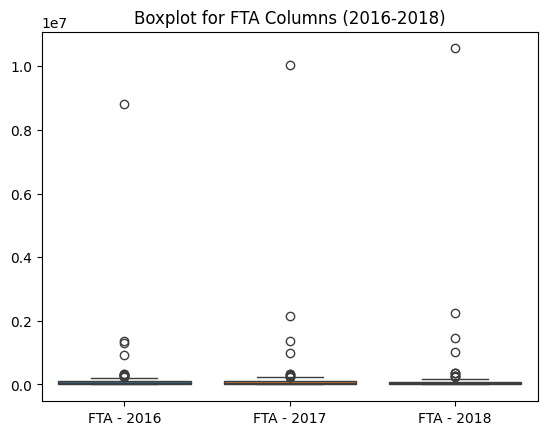

In [59]:
# Boxplot for visualizing outliers in columns
sns.boxplot(data=df[['FTA - 2016', 'FTA - 2017', 'FTA - 2018']])
plt.title("Boxplot for FTA Columns (2016-2018)")
plt.show()

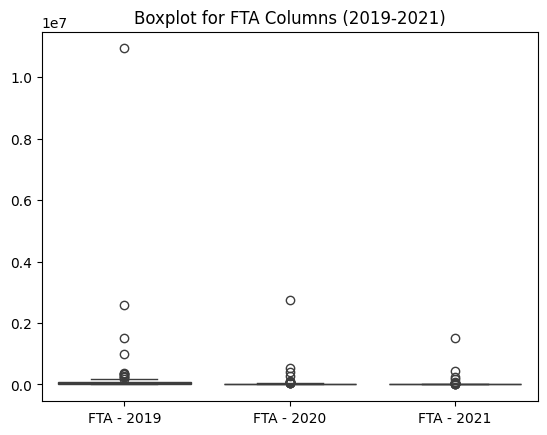

In [60]:
# Boxplot for visualizing outliers in columns
sns.boxplot(data=df[['FTA - 2019', 'FTA - 2020', 'FTA - 2021']])
plt.title("Boxplot for FTA Columns (2019-2021)")
plt.show()

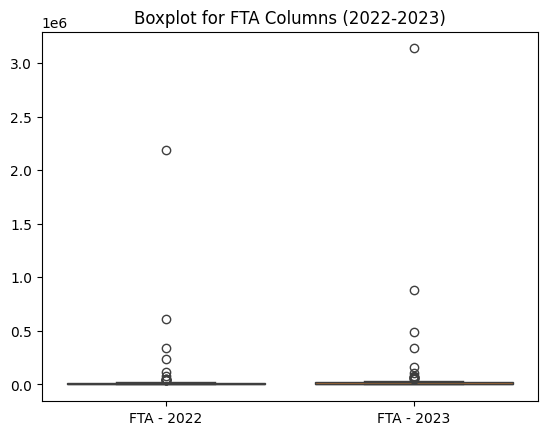

In [61]:
# Boxplot for visualizing outliers in columns
sns.boxplot(data=df[['FTA - 2022', 'FTA - 2023' ]])
plt.title("Boxplot for FTA Columns (2022-2023)")
plt.show()

Analysis after using box plot: We can see that many of the FTA columns have outliers but as they are real FTA values, not caused due to human errors!
FTAs can naturally vary due to global events (e.g., pandemics, wars, economic changes). So removing this natural values will affect in model predictions for extreme values...

# **Step6 : Uni-variate and Bi-variate Analysis**


## **Univariate Analysis**



---

1.   Used for understanding the trends and skewness of the data.
2.   Used for identifying inconsistencies and anamoly in the dataset.
3.   Used for decision whether scaling, normalization, or transformation is needed. (Specifically Histogram used but only for numerical values)





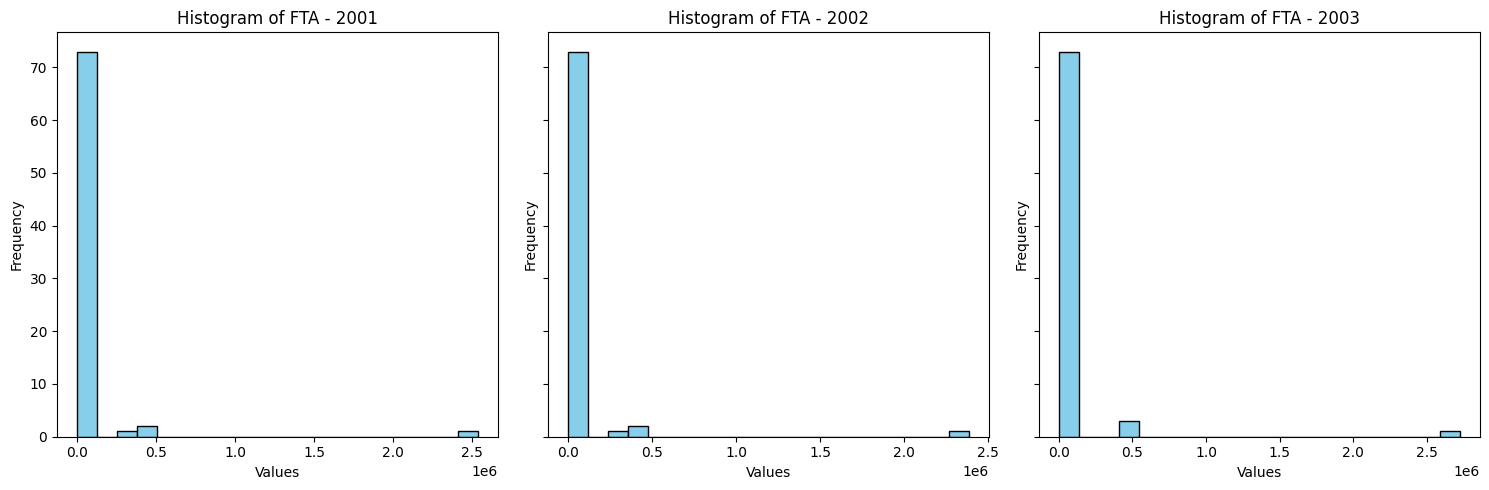

In [62]:
# Columns to plot
columns_to_plot = ['FTA - 2001', 'FTA - 2002', 'FTA - 2003']

# Create subplots using matplotlib
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(15, 5), sharey=True)

# Plot histograms for each column
for i, col in enumerate(columns_to_plot):
    axes[i].hist(df[col], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

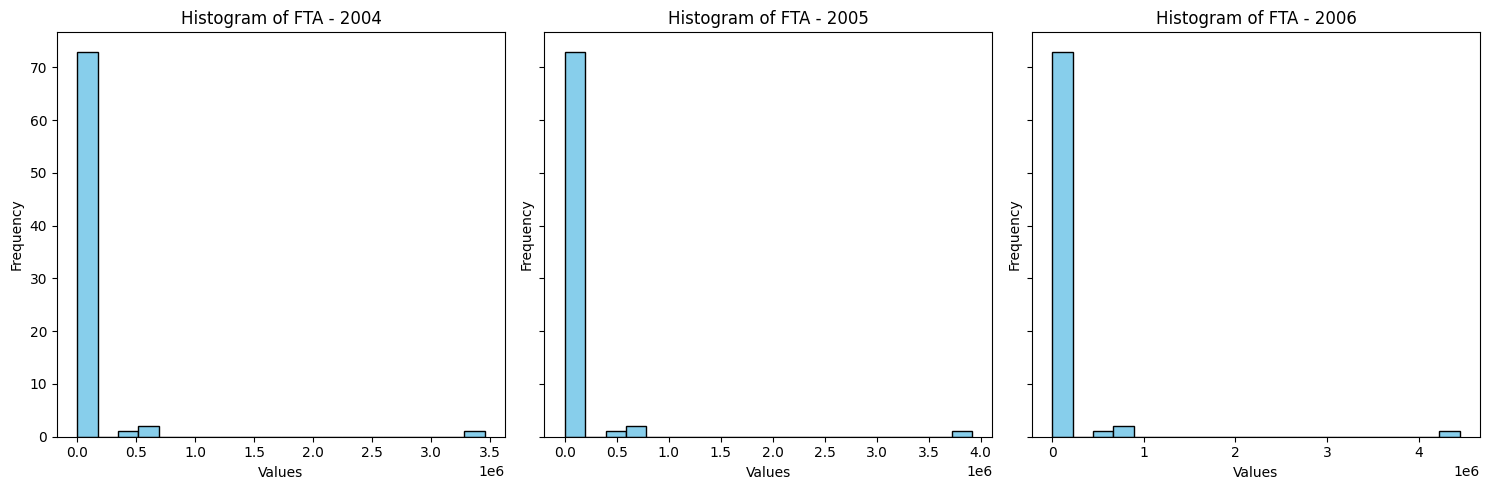

In [63]:
# Columns to plot
columns_to_plot = ['FTA - 2004', 'FTA - 2005', 'FTA - 2006']

# Create subplots using matplotlib
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(15, 5), sharey=True)

# Plot histograms for each column
for i, col in enumerate(columns_to_plot):
    axes[i].hist(df[col], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

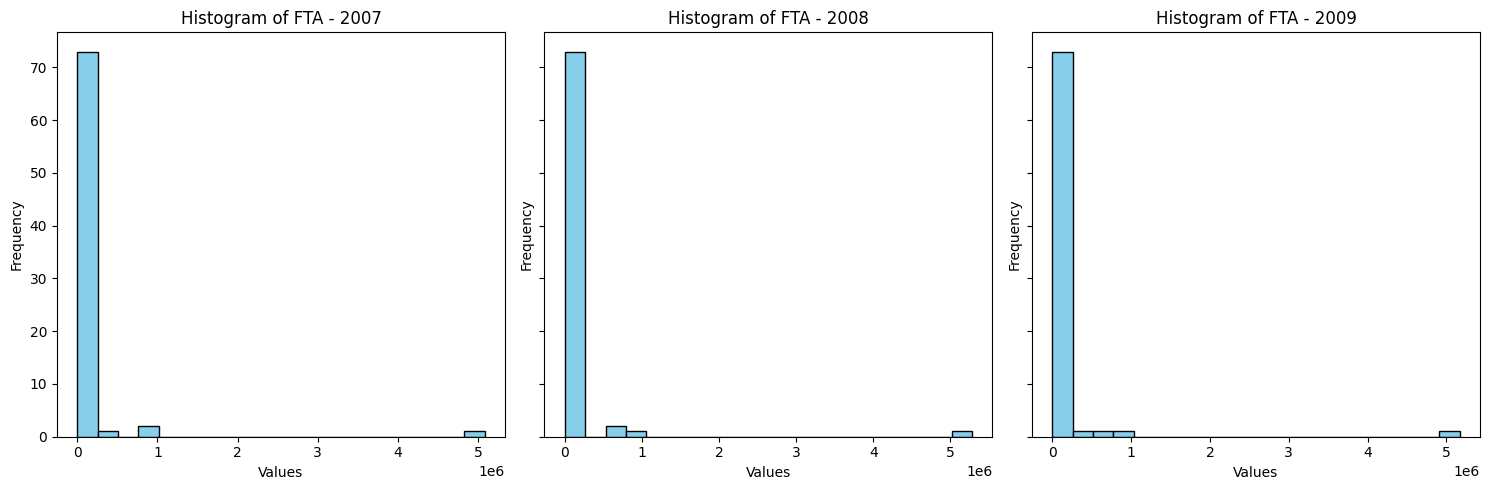

In [64]:
# Columns to plot
columns_to_plot = ['FTA - 2007', 'FTA - 2008', 'FTA - 2009']

# Create subplots using matplotlib
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(15, 5), sharey=True)

# Plot histograms for each column
for i, col in enumerate(columns_to_plot):
    axes[i].hist(df[col], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

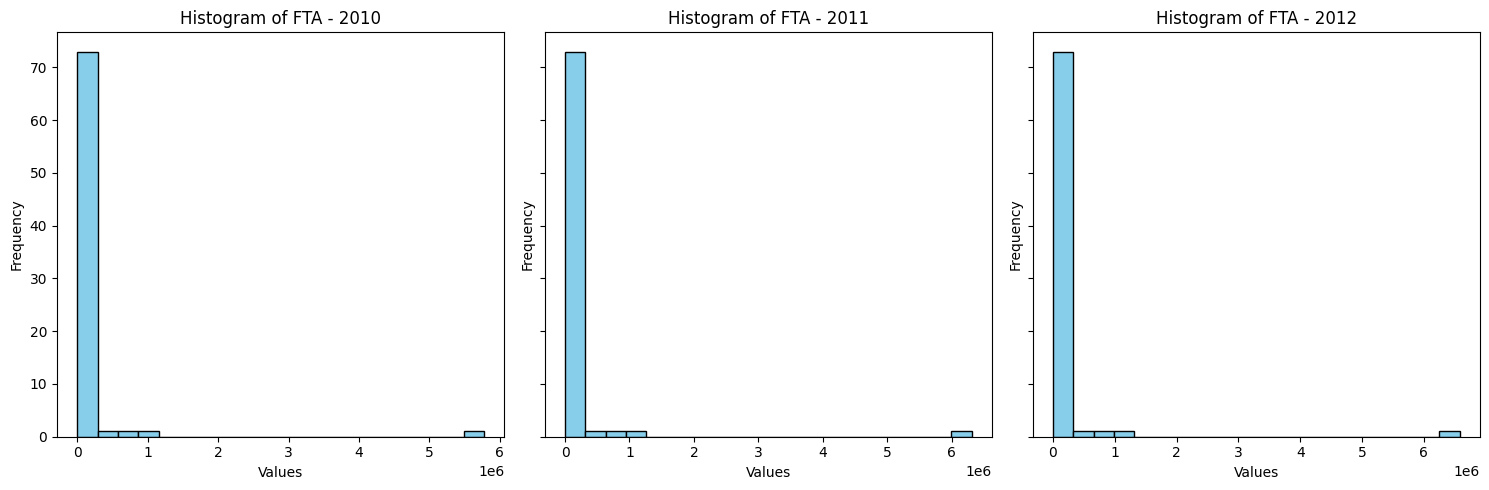

In [65]:
# Columns to plot
columns_to_plot = ['FTA - 2010', 'FTA - 2011', 'FTA - 2012']

# Create subplots using matplotlib
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(15, 5), sharey=True)

# Plot histograms for each column
for i, col in enumerate(columns_to_plot):
    axes[i].hist(df[col], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

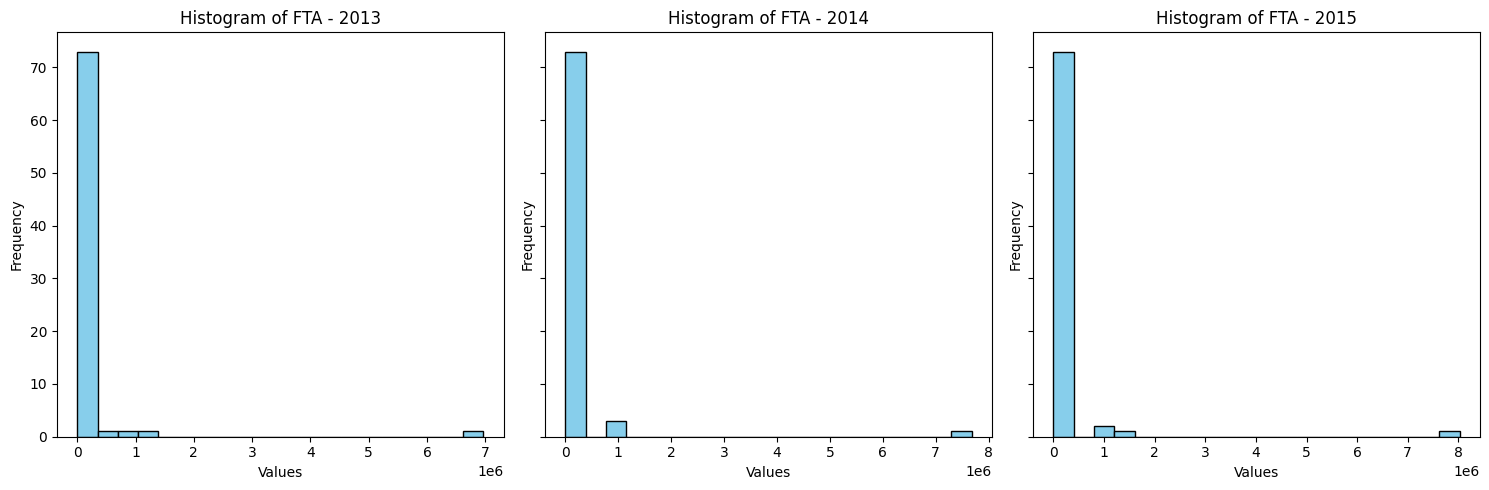

In [66]:
# Columns to plot
columns_to_plot = ['FTA - 2013', 'FTA - 2014', 'FTA - 2015']

# Create subplots using matplotlib
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(15, 5), sharey=True)

# Plot histograms for each column
for i, col in enumerate(columns_to_plot):
    axes[i].hist(df[col], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

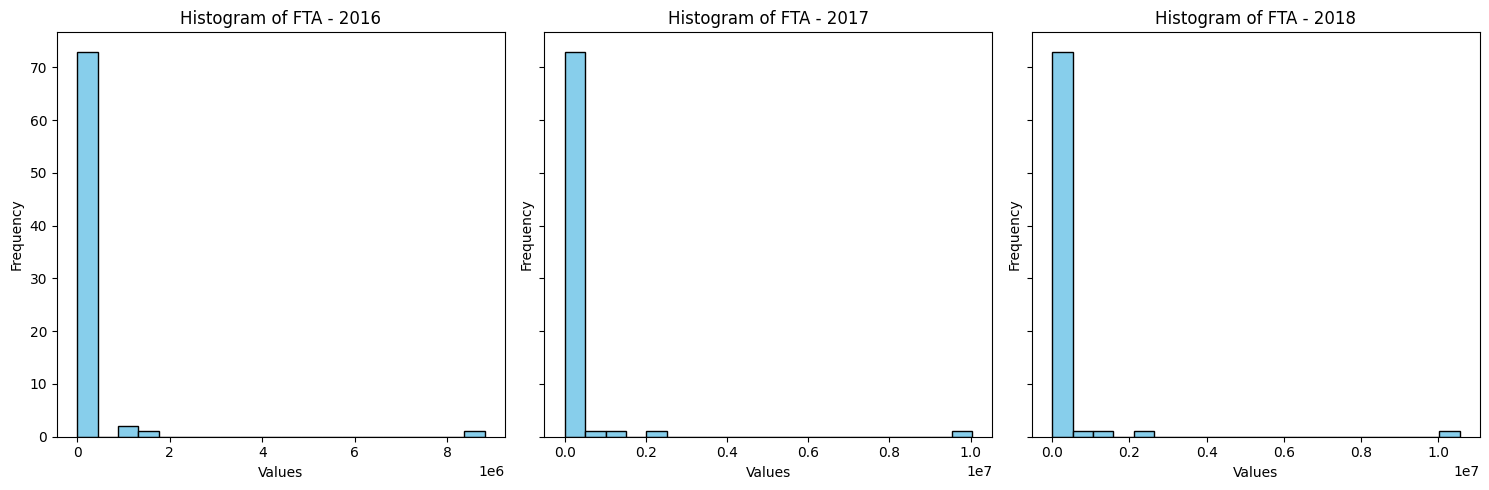

In [67]:
# Columns to plot
columns_to_plot = ['FTA - 2016', 'FTA - 2017', 'FTA - 2018']

# Create subplots using matplotlib
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(15, 5), sharey=True)

# Plot histograms for each column
for i, col in enumerate(columns_to_plot):
    axes[i].hist(df[col], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

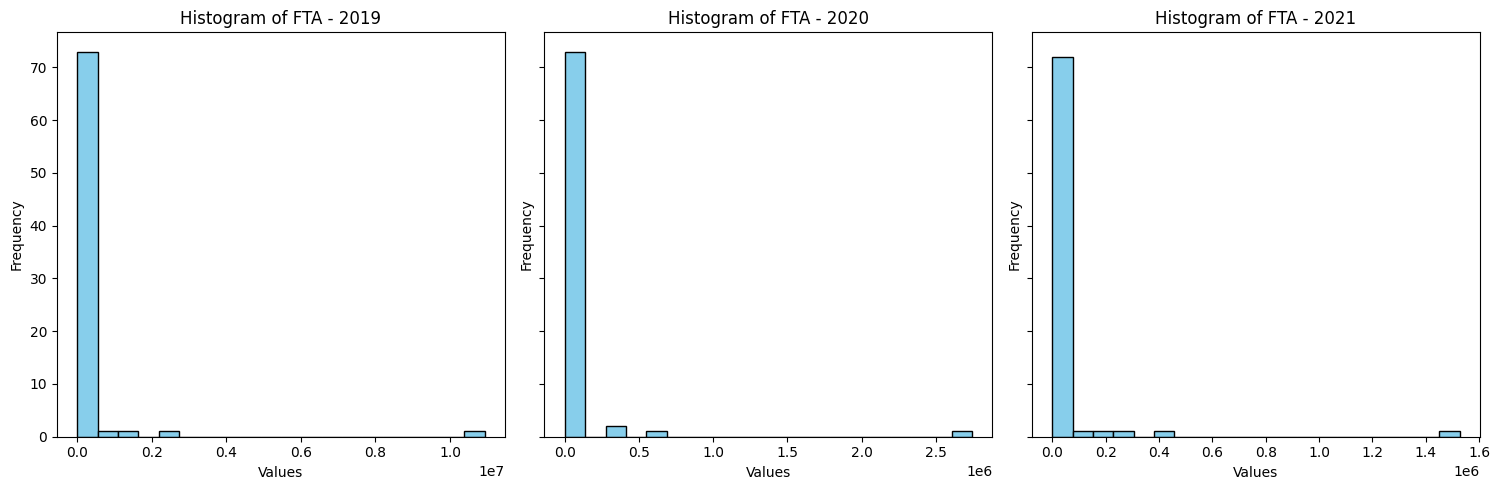

In [68]:
# Columns to plot
columns_to_plot = ['FTA - 2019', 'FTA - 2020', 'FTA - 2021']

# Create subplots using matplotlib
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(15, 5), sharey=True)

# Plot histograms for each column
for i, col in enumerate(columns_to_plot):
    axes[i].hist(df[col], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

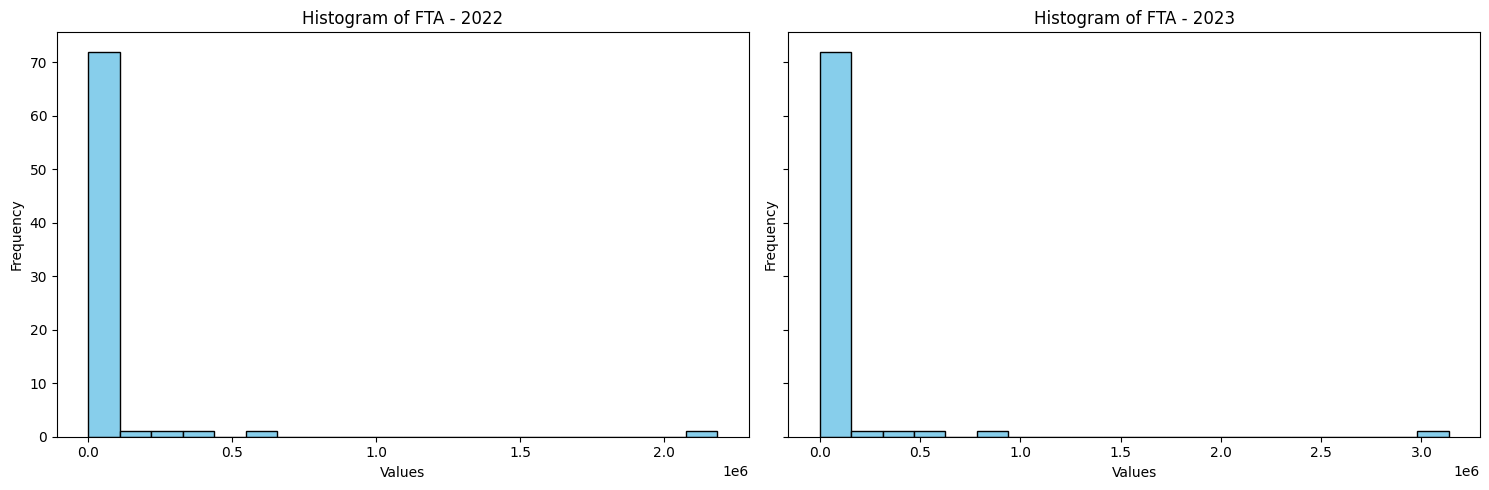

In [69]:
# Columns to plot
columns_to_plot = ['FTA - 2022', 'FTA - 2023' ]

# Create subplots using matplotlib
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(15, 5), sharey=True)

# Plot histograms for each column
for i, col in enumerate(columns_to_plot):
    axes[i].hist(df[col], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In Univariate Analysis, we do use PIE plot for the distribution of Categorical values.

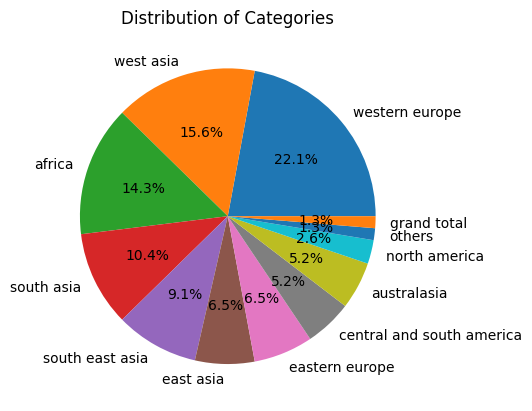

In [70]:
#plotting pie plot of Category using matplotlib.
plt.pie(df['Category'].value_counts(), labels=df['Category'].value_counts().index, autopct='%1.1f%%')
#giving title to plot
plt.title('Distribution of Categories')
#showing the plot
plt.show()

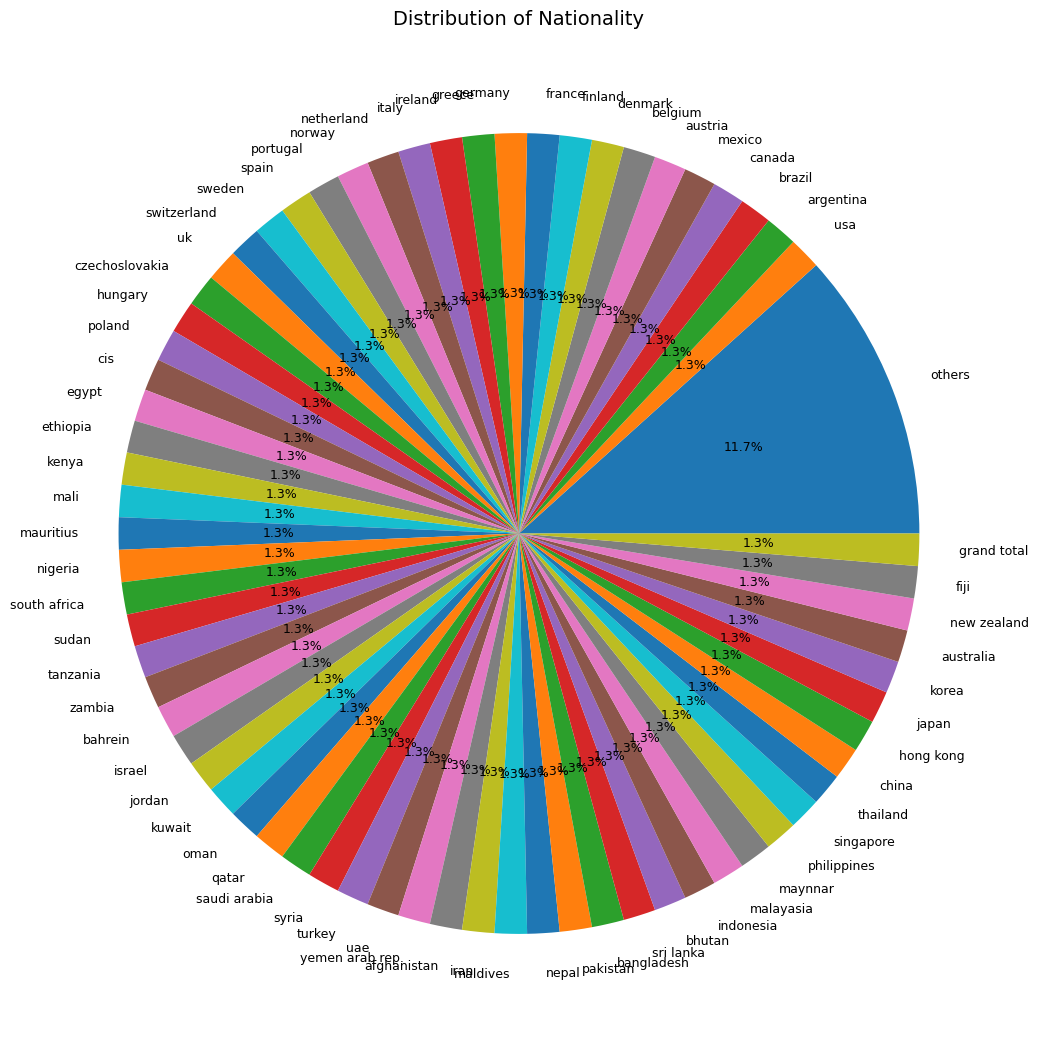

In [74]:
# Setting the figure size
plt.figure(figsize=(13, 13))

#Plotting pie chart on Nationality column...
plt.pie(df['Nationality'].value_counts(),
        labels=df['Nationality'].value_counts().index,
        autopct='%1.1f%%',
        textprops={'fontsize': 9})

# Adding a title
plt.title('Distribution of Nationality', fontsize=14)

# Showing the plot
plt.show()

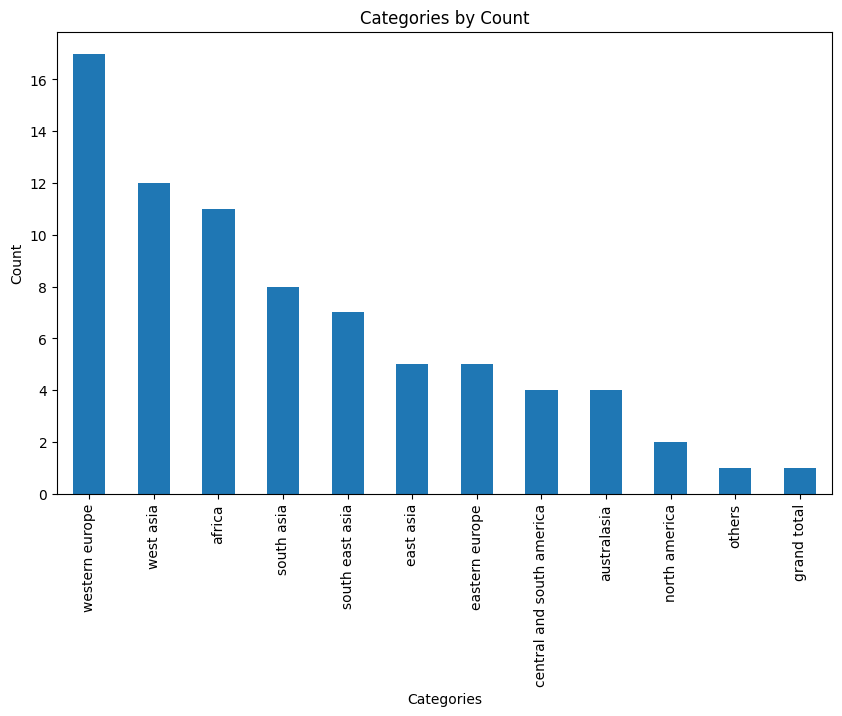

In [72]:
#plotting the Bar plot for all Category wise FTA counts...
df['Category'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Categories by Count')
plt.ylabel('Count')
plt.xlabel('Categories')
plt.show()

Now as we dataset for FTA year wise from 2001 to 2023, so we can also see trend of FTA for nationality wise from years 2001 to 2023. So using this trend we can infer that how the FTA values are distributed across years for a nationality. It is increasing monotically, decreasing or side-ways trend.

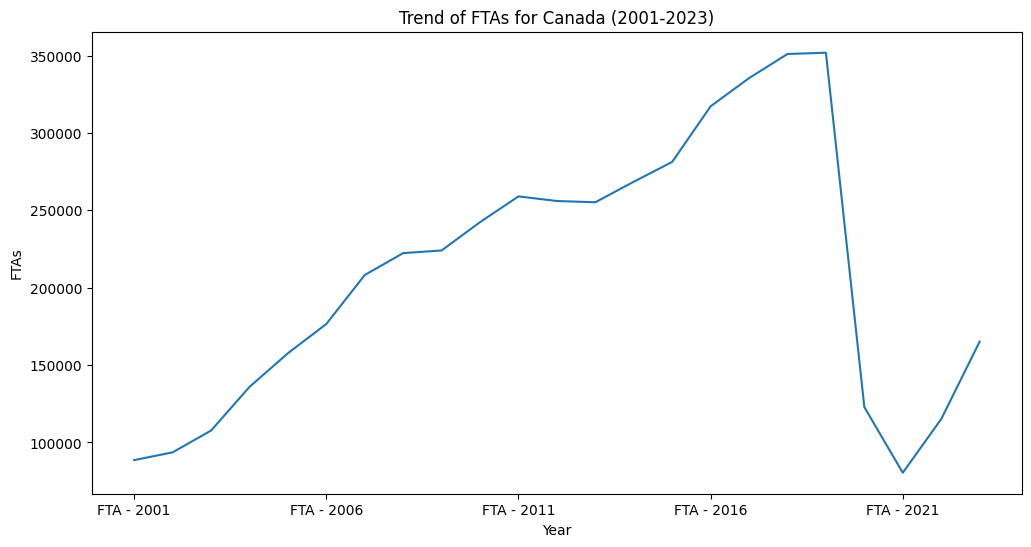

In [73]:
#Plot the trend of FTA year-wise for a nationality = Canada using Pandas and Matplotlib
df.set_index('Nationality').loc['canada', 'FTA - 2001':'FTA - 2023'].plot(figsize=(12, 6))
plt.title('Trend of FTAs for Canada (2001-2023)')
plt.ylabel('FTAs')
plt.xlabel('Year')
plt.show()

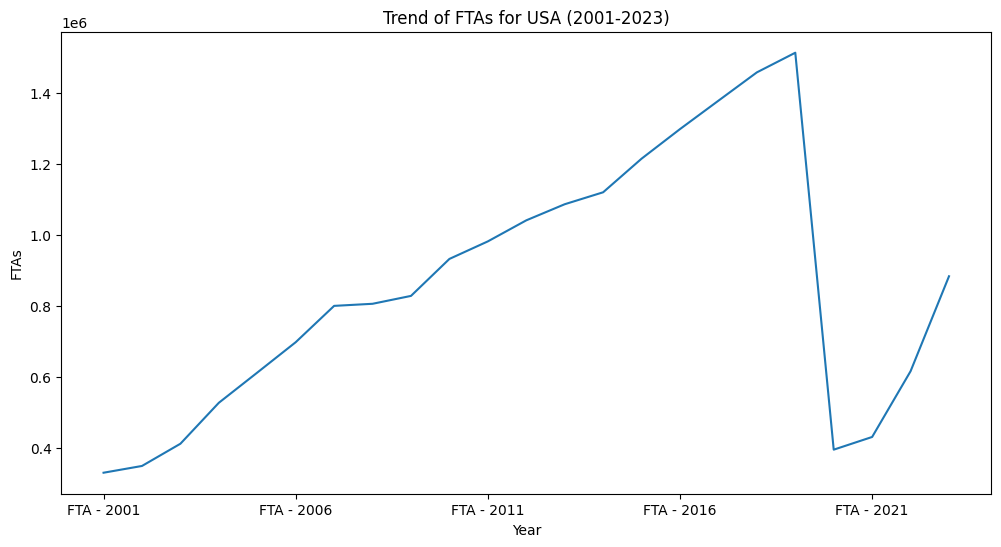

In [75]:
#Plot the trend of FTA year-wise for a nationality = USA using Pandas and Matplotlib
df.set_index('Nationality').loc['usa', 'FTA - 2001':'FTA - 2023'].plot(figsize=(12, 6))
plt.title('Trend of FTAs for USA (2001-2023)')
plt.ylabel('FTAs')
plt.xlabel('Year')
plt.show()

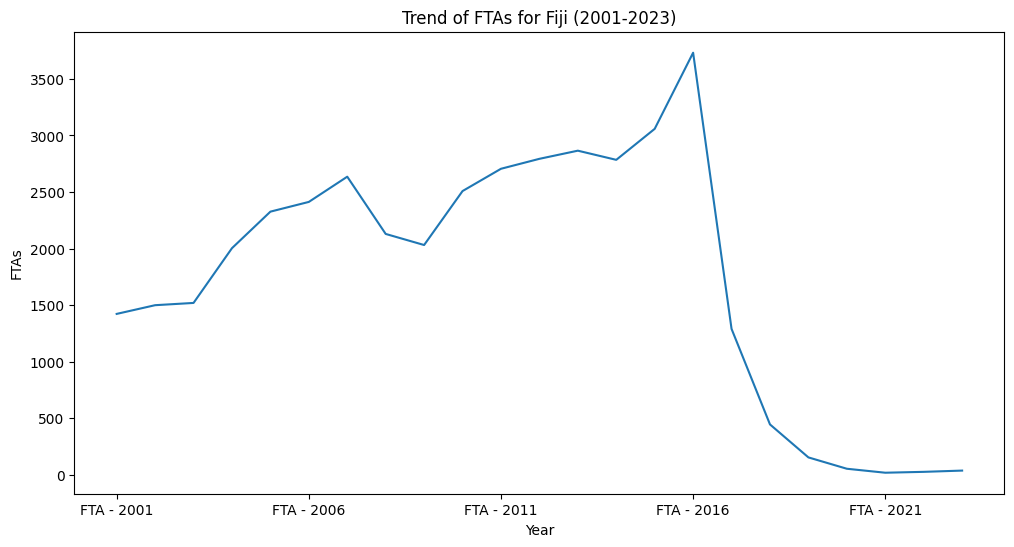

In [76]:
#Plot the trend of FTA year-wise for a nationality = Fiji using Pandas and Matplotlib
df.set_index('Nationality').loc['fiji', 'FTA - 2001':'FTA - 2023'].plot(figsize=(12, 6))
plt.title('Trend of FTAs for Fiji (2001-2023)')
plt.ylabel('FTAs')
plt.xlabel('Year')
plt.show()

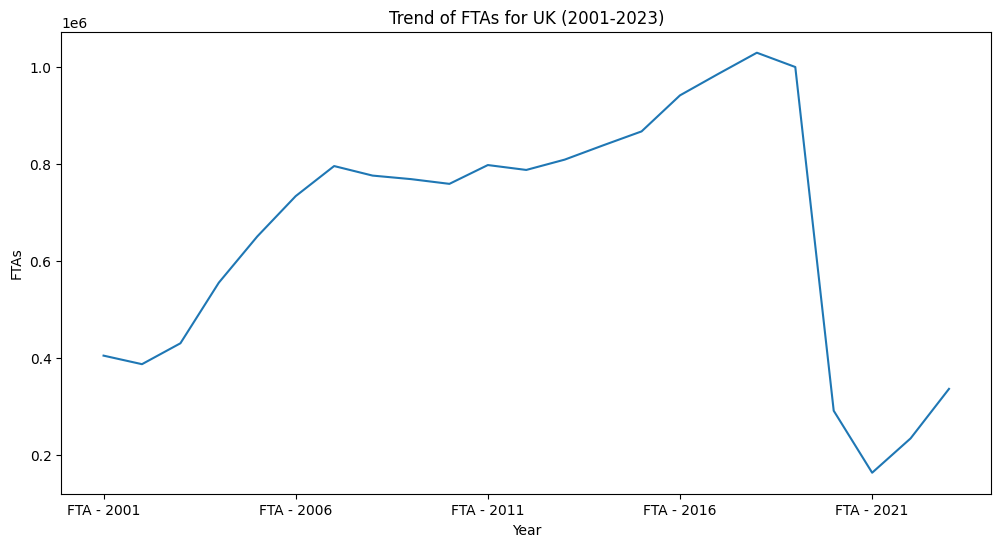

In [77]:
#Plot the trend of FTA year-wise for a nationality = UK using Pandas and Matplotlib
df.set_index('Nationality').loc['uk', 'FTA - 2001':'FTA - 2023'].plot(figsize=(12, 6))
plt.title('Trend of FTAs for UK (2001-2023)')
plt.ylabel('FTAs')
plt.xlabel('Year')
plt.show()

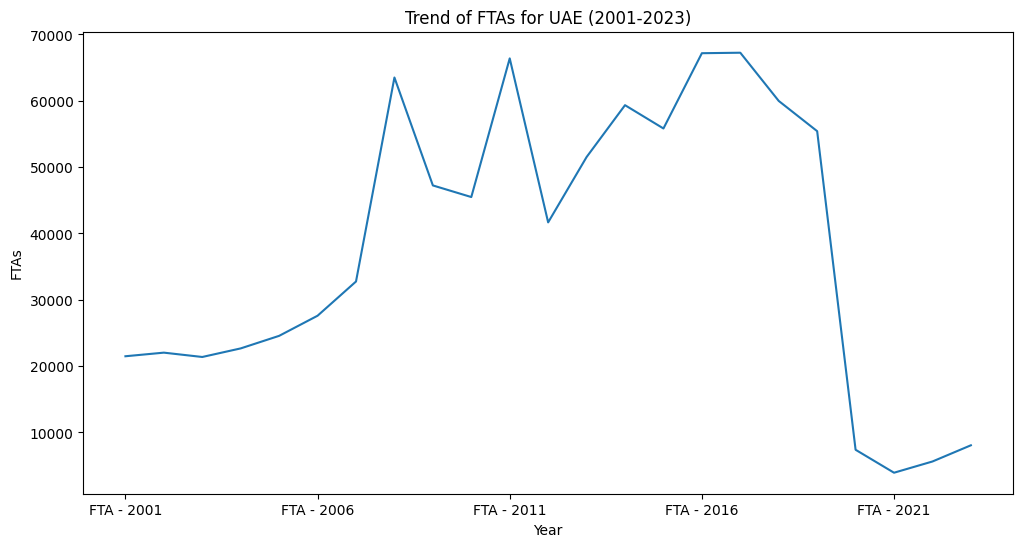

In [78]:
#Plot the trend of FTA year-wise for a nationality = UAE using Pandas and Matplotlib
df.set_index('Nationality').loc['uae', 'FTA - 2001':'FTA - 2023'].plot(figsize=(12, 6))
plt.title('Trend of FTAs for UAE (2001-2023)')
plt.ylabel('FTAs')
plt.xlabel('Year')
plt.show()

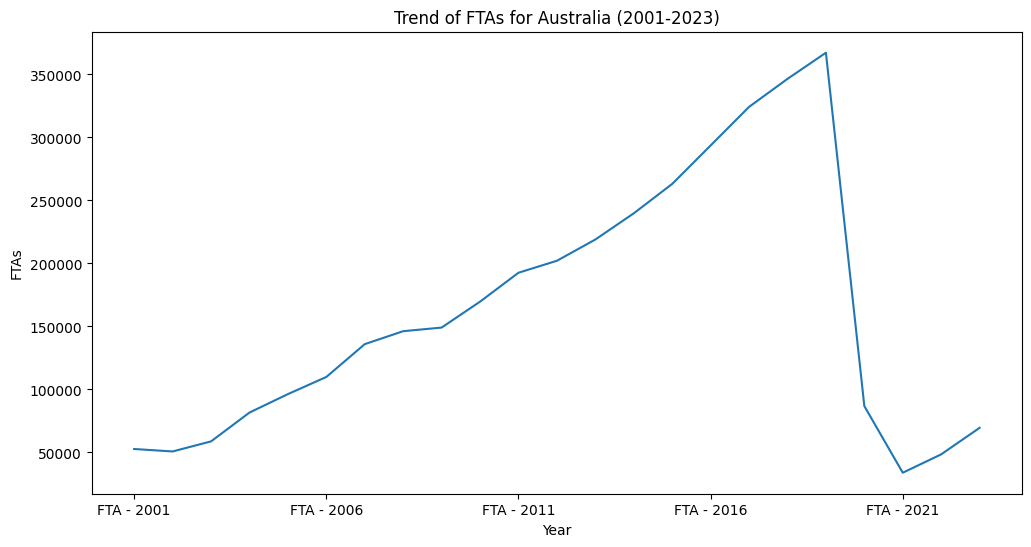

In [79]:
#Plot the trend of FTA year-wise for a nationality = Australia using Pandas and Matplotlib
df.set_index('Nationality').loc['australia', 'FTA - 2001':'FTA - 2023'].plot(figsize=(12, 6))
plt.title('Trend of FTAs for Australia (2001-2023)')
plt.ylabel('FTAs')
plt.xlabel('Year')
plt.show()

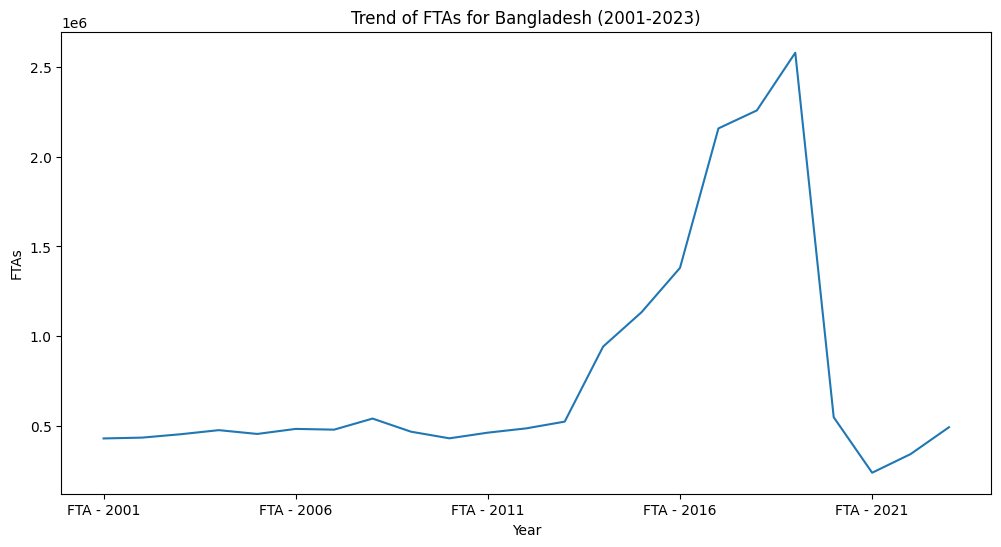

In [80]:
#Plot the trend of FTA year-wise for a nationality = Bangladesh using Pandas and Matplotlib
df.set_index('Nationality').loc['bangladesh', 'FTA - 2001':'FTA - 2023'].plot(figsize=(12, 6))
plt.title('Trend of FTAs for Bangladesh (2001-2023)')
plt.ylabel('FTAs')
plt.xlabel('Year')
plt.show()

In [81]:
#creating a copy of df for further analysis
df_copy1 = df.copy()

In [82]:
#display first 5 rows...
df_copy1.head()

,Category,Nationality,FTA - 2001,FTA - 2002,FTA - 2003,FTA - 2004,FTA - 2005,FTA - 2006,FTA - 2007,FTA - 2008,...,FTA - 2014,FTA - 2015,FTA - 2016,FTA - 2017,FTA - 2018,FTA - 2019,FTA - 2020,FTA - 2021,FTA - 2022,FTA - 2023
0,north america,canada,88600.0,93598.0,107671.0,135884.0,157643.0,176567.0,208214.0,222364.0,...,268485.0,281306.0,317239.0,335439.0,351040.0,351859.0,122868.0,80437.0,115088.64,165127.17
1,north america,usa,329147.0,348182.0,410803.0,526120.0,611165.0,696739.0,799062.0,804933.0,...,1118983.0,1213624.0,1296939.0,1376919.0,1456678.0,1512032.0,394092.0,429860.0,615040.35,882449.20
4,central and south america,argentina,2906.0,1359.0,1805.0,2799.0,3313.0,4493.0,4992.0,5087.0,...,9731.0,9351.0,12308.0,14875.0,16345.0,12844.0,4294.0,530.0,758.32,1088.02
5,central and south america,brazil,3819.0,3622.0,4528.0,7397.0,7005.0,9148.0,10788.0,11530.0,...,19563.0,20610.0,21289.0,24453.0,26579.0,25422.0,8092.0,2055.0,2940.28,4218.66
6,central and south america,mexico,3473.0,3105.0,3563.0,4570.0,5398.0,6502.0,8299.0,9272.0,...,13978.0,14049.0,15689.0,18114.0,19909.0,20766.0,4580.0,859.0,1229.05,1763.42


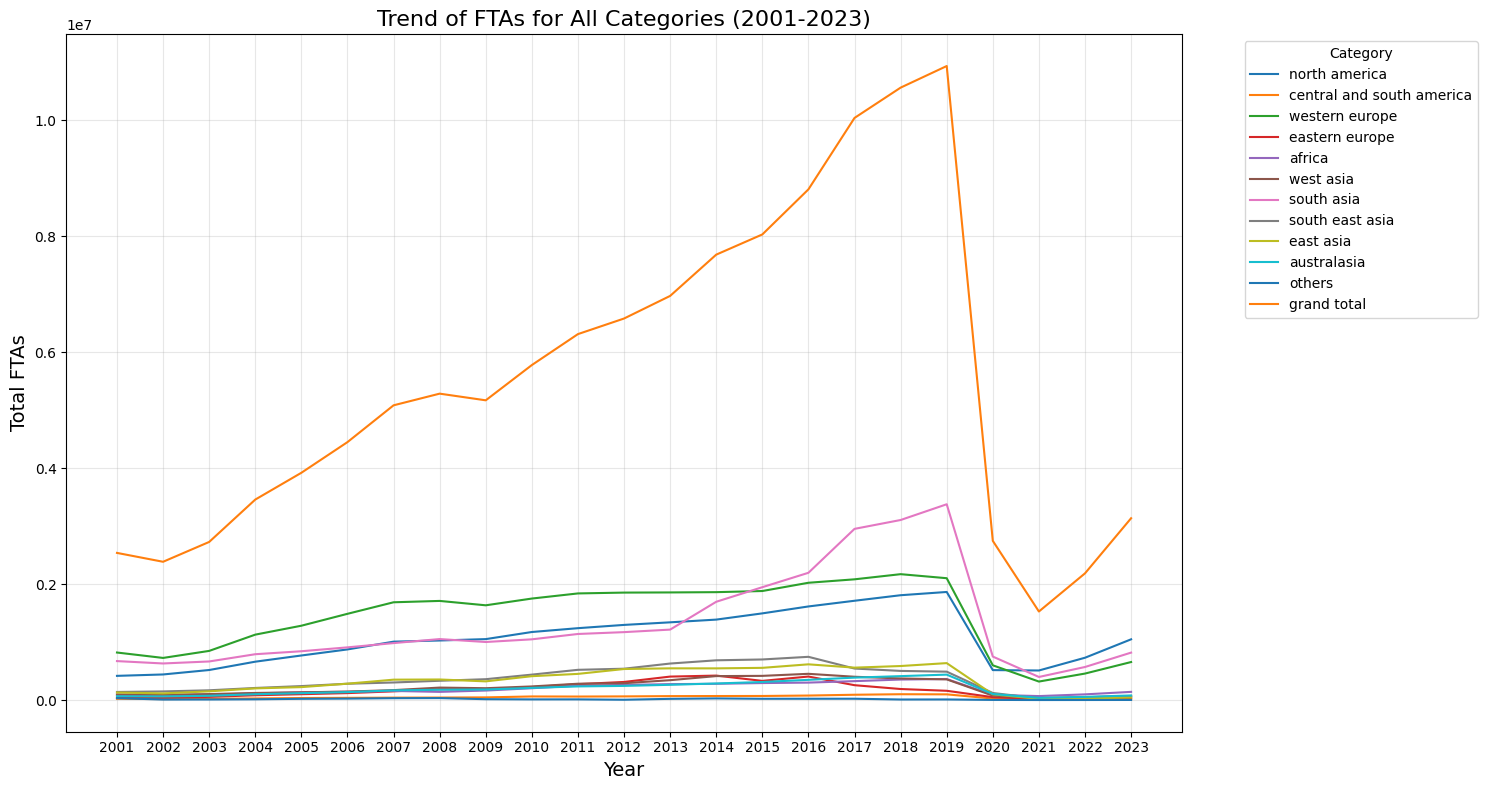

In [83]:
# Creating trend of ALL unique categories together for FTA - 2001 to FTA - 2023.
# Step 1: Get all unique categories
categories = df_copy1['Category'].unique()  # Get unique categories
fta_columns = [col for col in df_copy1.columns if 'FTA' in col]  # Get all FTA columns

# Step 2: Use the plot
plt.figure(figsize=(15, 8))

# Step 3: Loop through each category and plot trends
for category in categories:
    df_category = df_copy1[df_copy1['Category'] == category]

    # Calculate the sum of FTAs for each year for the current category
    df_category_trend = df_category[fta_columns].sum(axis=0)

    # Plotting the trend for this category using matplotlib
    plt.plot(df_category_trend.index.str.replace('FTA - ', ''),
             df_category_trend.values,
             label=category)

# Step 4: Customizing the plot according to our requirements
plt.title('Trend of FTAs for All Categories (2001-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total FTAs', fontsize=14)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()

# Step 5: Showing the plot
plt.show()

In [84]:
#creating another copy of df for further analysis
df_copy2 = df.copy()
# Group by 'Category' and sum up FTA values year-wise (2001 to 2023)
fta_columns = [col for col in df_copy2.columns if 'FTA' in col]  # Get all FTA columns
df_grouped = df_copy2.groupby('Category')[fta_columns].sum()

# Display the resulting DataFrame
df_grouped.head()

,FTA - 2001,FTA - 2002,FTA - 2003,FTA - 2004,FTA - 2005,FTA - 2006,FTA - 2007,FTA - 2008,FTA - 2009,FTA - 2010,...,FTA - 2014,FTA - 2015,FTA - 2016,FTA - 2017,FTA - 2018,FTA - 2019,FTA - 2020,FTA - 2021,FTA - 2022,FTA - 2023
Category,,,,,,,,,,,,,,,,,,,,,
africa,90962.0,83457.0,93353.0,115493.0,134801.0,142813.0,157485.0,141750.0,164474.0,204525.0,...,280754.0,293569.0,301409.0,326673.66,354182.58,363336.79,90652.14,69034.40,98773.87,141719.03
australasia,66104.0,63261.0,73849.0,100944.0,119778.0,137436.0,167063.0,178308.0,182451.0,210275.0,...,286294.0,312101.0,349108.0,387348.48,413072.88,439092.35,105100.09,38882.95,55633.42,79821.86
central and south america,21925.0,17672.0,21654.0,28165.0,35586.0,38745.0,42319.0,43505.0,46604.0,62728.0,...,69926.0,70831.0,78232.0,92067.00,101085.00,98926.00,26968.00,6798.00,9726.53,13955.45
east asia,130464.0,115424.0,150506.0,201627.0,223567.0,282985.0,352037.0,355230.0,322797.0,411947.0,...,546792.0,555770.0,616476.0,559349.92,587293.52,637351.27,99663.45,20966.94,29999.34,43042.52
eastern europe,38863.0,40628.0,55252.0,83055.0,101410.0,120191.0,150718.0,188277.0,180383.0,224079.0,...,422278.0,331051.0,405986.0,256797.71,190805.61,160501.19,50614.32,18604.63,26619.36,38193.00




## **Bivariate Analysis**


---
For Bi-variate analysis, we have used seaborn library where we can analysis that how the columns of different years of FTA are related with each other whether have linear relationships or not. Generally we use one column as our Target feature for which we have to predict values so here as our target feature is FTA values so we have used here only FTA values only. For that we have used

*   Scatter Plot - From which we can infer that how the 2 FTA columns are related to each other. If the dots in the scatter plot is like linear then we have linear relationships, if dots scattered far then we dont have any linear like relationships.
*   Correlation matrix(Heatmap) - Scatter plot just used for 2 columns and plot the values of FTA in the graph. But the Correlation matrix show the Correlation values of the all the combinations possible for FTA columns so from this we can infer that if a cell value(correlation value) is greater than 0.7 or 0.6 means correlation b/w that both columns is high so we can use this columns for our feature selection and can predict that target feature accurately. Alternately, if correlation value less than 0.5 than we can reject that feature for feature selection for our target variable/




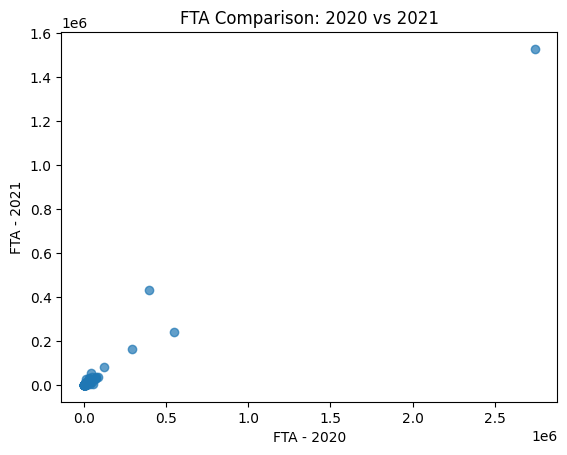

In [85]:
#scatter plot for columns FTA - 2020 and 2021 for all nationalities
plt.scatter(df['FTA - 2020'], df['FTA - 2021'], alpha=0.7)
plt.title('FTA Comparison: 2020 vs 2021')
plt.xlabel('FTA - 2020')
plt.ylabel('FTA - 2021')
plt.show()

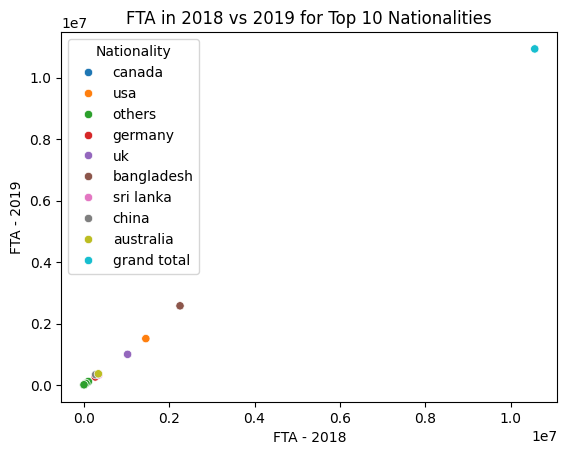

In [86]:
# Get the top 10 nationalities based on the sum of FTA over all years
top_nationalities = df_copy2.groupby('Nationality')[['FTA - 2018', 'FTA - 2019','FTA - 2019', 'FTA - 2021', 'FTA - 2023']].sum().sum(axis=1).nlargest(10).index

# Filtering the dataset for the top 10 nationalities
df_top_nationalities = df_copy2[df_copy2['Nationality'].isin(top_nationalities)]

# Plotting the scatter plot together for top 10 nationalities in year 2018 and 2019 for FTA values
sns.scatterplot(data=df_top_nationalities, x='FTA - 2018', y='FTA - 2019', hue='Nationality')
plt.title('FTA in 2018 vs 2019 for Top 10 Nationalities')
plt.show()

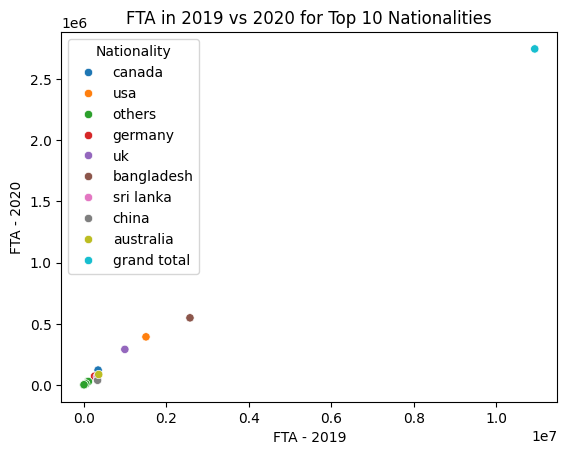

In [87]:
# Plotting the scatter plot together for top 10 nationalities in year 2019 and 2020 for FTA values
sns.scatterplot(data=df_top_nationalities, x='FTA - 2019', y='FTA - 2020', hue='Nationality')
plt.title('FTA in 2019 vs 2020 for Top 10 Nationalities')
plt.show()

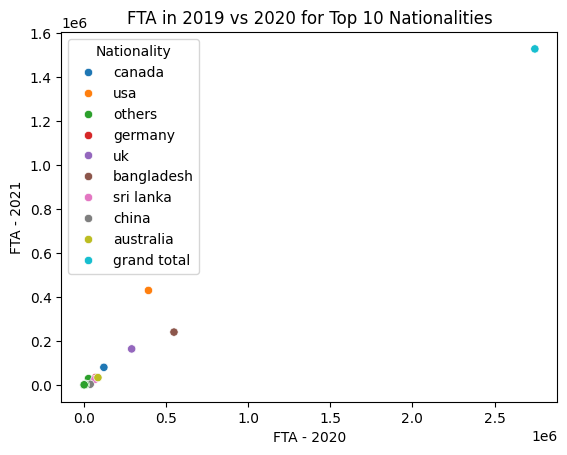

In [88]:
# Plotting the scatter plot together for top 10 nationalities in year 2020 and 2021 for FTA values
sns.scatterplot(data=df_top_nationalities, x='FTA - 2020', y='FTA - 2021', hue='Nationality')
plt.title('FTA in 2019 vs 2020 for Top 10 Nationalities')
plt.show()

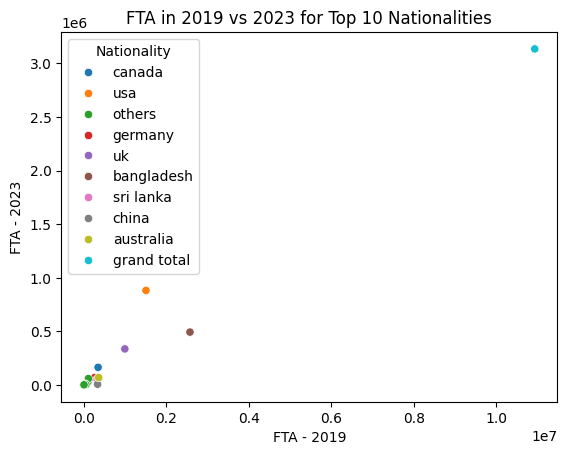

In [89]:
# Plotting the scatter plot together for top 10 nationalities in year 2019 and 2023 for FTA values
sns.scatterplot(data=df_top_nationalities, x='FTA - 2019', y='FTA - 2023', hue='Nationality')
plt.title('FTA in 2019 vs 2023 for Top 10 Nationalities')
plt.show()

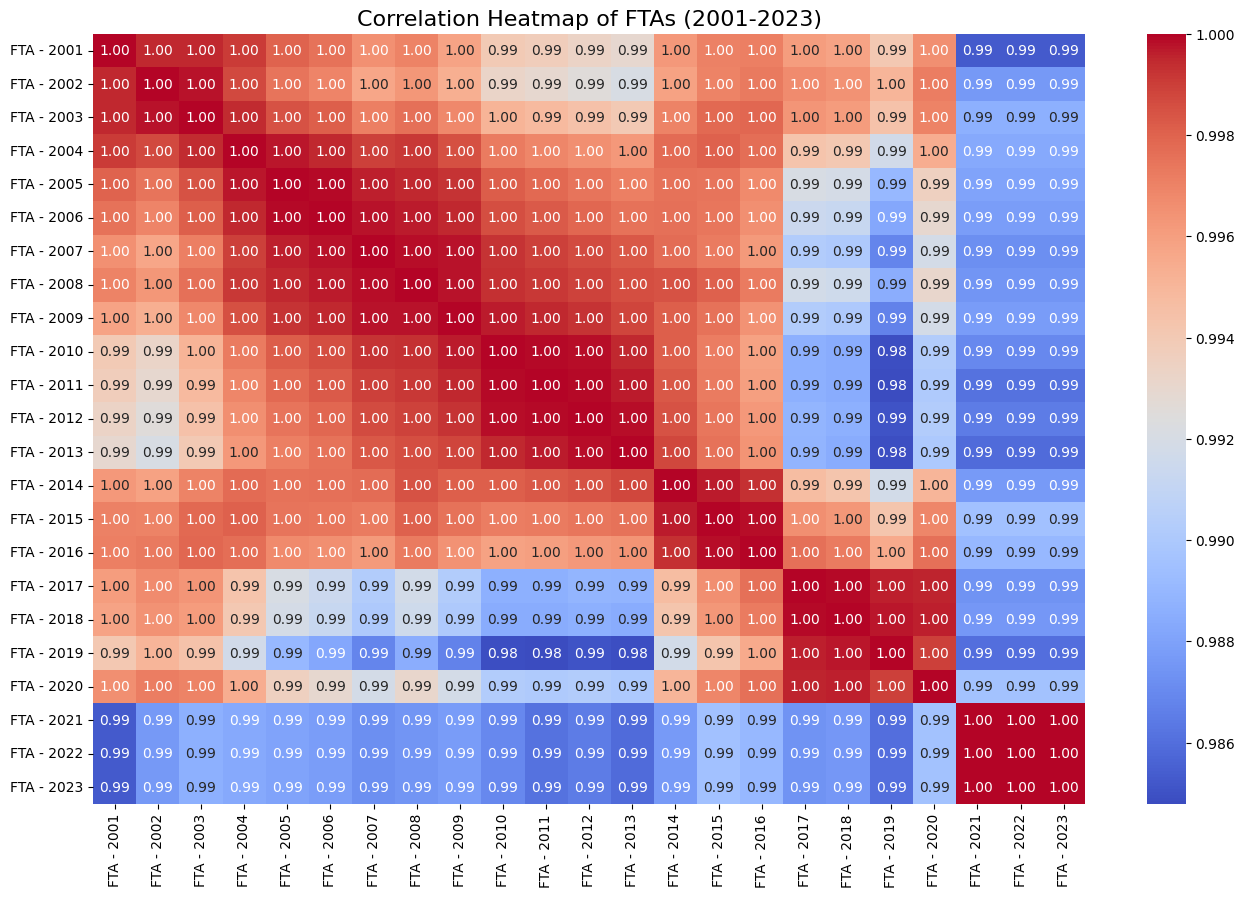

In [90]:
# Setting the figure size before plotting the heatmap so that correlation values are properly displayed in the heatmap
plt.figure(figsize=(16, 10))

# Creating the heatmap
sns.heatmap(df.filter(like='FTA').corr(), annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 10})

# Adding the title
plt.title('Correlation Heatmap of FTAs (2001-2023)', fontsize=16)
plt.show()

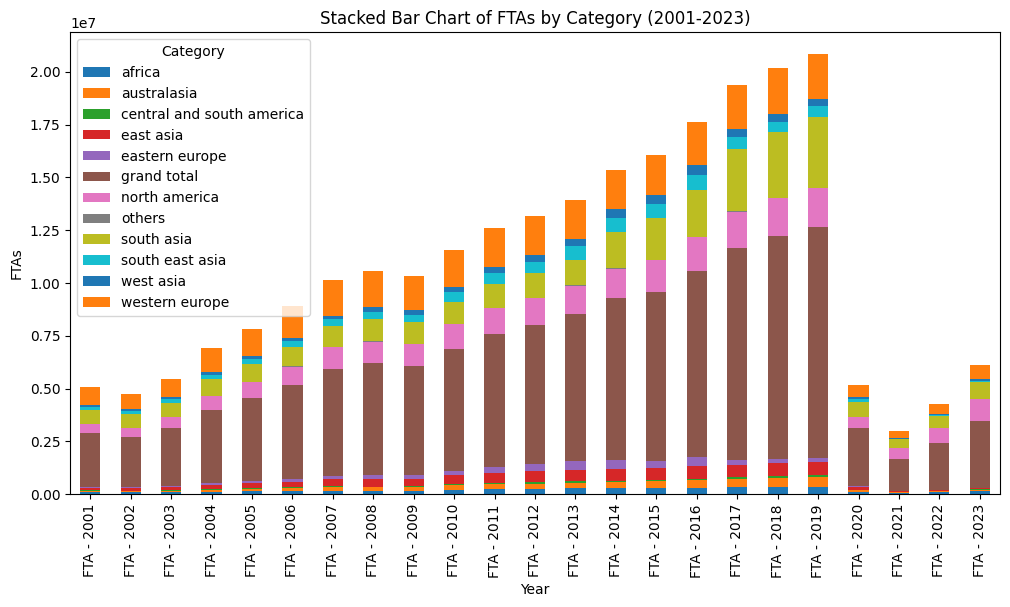

In [91]:
#plotting the total FTA values category wise for all years from 2001 to 2023 in a bar plot format for better visualisation
df.groupby('Category').sum().filter(like='FTA -').T.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Stacked Bar Chart of FTAs by Category (2001-2023)')
plt.xlabel('Year')
plt.ylabel('FTAs')
plt.show()

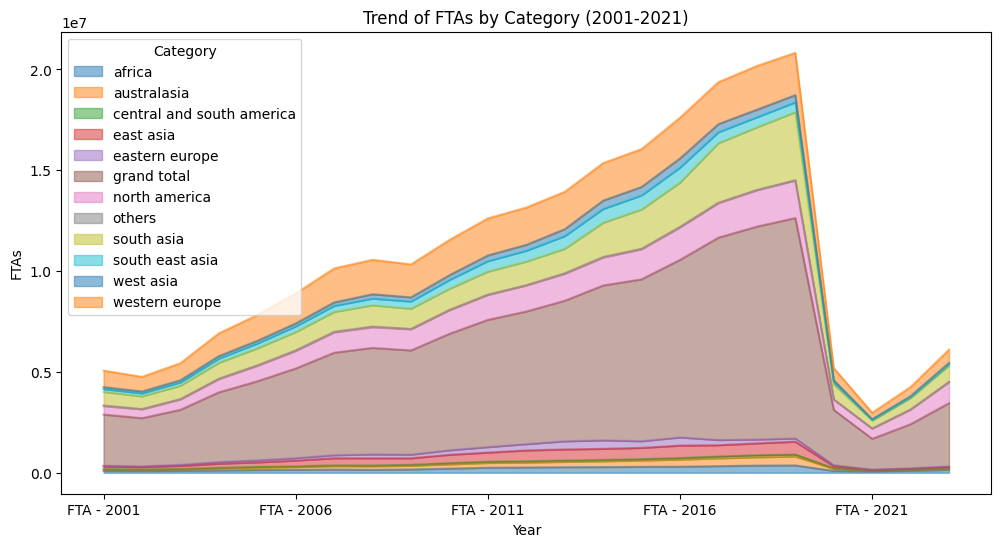

In [92]:
#plotting the Area Chart of total FTA values category wise for all years from 2001 to 2023 for better visualisation
df.groupby('Category').sum().filter(like='FTA -').T.plot(kind='area', figsize=(12, 6), alpha=0.5)
plt.title('Trend of FTAs by Category (2001-2021)')
plt.xlabel('Year')
plt.ylabel('FTAs')
plt.show()

In [93]:
#creating a copy of df for creating a map, for better visualisation and analysis...
df_copy3 = df.copy()
df_copy3.drop(columns=['Category'], inplace=True)

In [94]:
#showing all unique nationalities
df_copy3['Nationality'].unique()

array(['canada', 'usa', 'argentina', 'brazil', 'mexico', 'others',
       'austria', 'belgium', 'denmark', 'finland', 'france', 'germany',
       'greece', 'ireland', 'italy', 'netherland', 'norway', 'portugal',
       'spain', 'sweden', 'switzerland', 'uk', 'czechoslovakia',
       'hungary', 'poland', 'cis', 'egypt', 'ethiopia', 'kenya', 'mali',
       'mauritius', 'nigeria', 'south africa', 'sudan', 'tanzania',
       'zambia', 'bahrein', 'israel', 'jordan', 'kuwait', 'oman', 'qatar',
       'saudi arabia', 'syria', 'turkey', 'uae', 'yemen arab rep.',
       'afghanistan', 'iran', 'maldives', 'nepal', 'pakistan',
       'bangladesh', 'sri lanka', 'bhutan', 'indonesia', 'malayasia',
       'maynnar', 'philippines', 'singapore', 'thailand', 'china',
       'hong kong', 'japan', 'korea', 'australia', 'new zealand', 'fiji',
       'grand total'], dtype=object)

In [95]:
# Reset the index to make 'Nationality' a column again for doing nationalities name in format that can be
# understand by plotly library
df_copy3 = df_copy2.reset_index()

# Now we can access the 'Nationality' column
df_copy3['Nationality'] = df_copy3['Nationality'].str.title()

In [96]:
#some changes in the nationality name for compatible formatting for plotly.
df_copy3['Nationality'] = df_copy3['Nationality'].replace('Usa', 'USA')
df_copy3['Nationality'] = df_copy3['Nationality'].replace('Uk', 'UK')
df_copy3['Nationality'] = df_copy3['Nationality'].replace('Uae', 'UAE')

In [97]:
#import plotly.express to create choropleth map
import plotly.express as px

In [98]:
# Creating the choropleth map
fig = px.choropleth(df_copy3,
                    locations='Nationality',  # Using the Nationality column as locations
                    color='FTA - 2001',        # Color based on FTA in 2001
                    hover_name='Nationality',  # Hovering text shows Nationality
                    color_continuous_scale="RdYlBu",  # we can change the color scale as needed(e.g.,'RdYlBu','Cividis','Plasma')
                    range_color=[0, 1500000],   # we can adjust this color scale range if needed
                    title="FTA Distribution by Nationality (2001)",  # Title of the map on year based
                    locationmode='country names')  # Using country names for locations

# Showing the map for FTA - 2001
fig.show()

Step7 : Model Development using Feature Engineering

In [99]:
#display top 5 rows...
df.head()

,Category,Nationality,FTA - 2001,FTA - 2002,FTA - 2003,FTA - 2004,FTA - 2005,FTA - 2006,FTA - 2007,FTA - 2008,...,FTA - 2014,FTA - 2015,FTA - 2016,FTA - 2017,FTA - 2018,FTA - 2019,FTA - 2020,FTA - 2021,FTA - 2022,FTA - 2023
0,north america,canada,88600.0,93598.0,107671.0,135884.0,157643.0,176567.0,208214.0,222364.0,...,268485.0,281306.0,317239.0,335439.0,351040.0,351859.0,122868.0,80437.0,115088.64,165127.17
1,north america,usa,329147.0,348182.0,410803.0,526120.0,611165.0,696739.0,799062.0,804933.0,...,1118983.0,1213624.0,1296939.0,1376919.0,1456678.0,1512032.0,394092.0,429860.0,615040.35,882449.20
4,central and south america,argentina,2906.0,1359.0,1805.0,2799.0,3313.0,4493.0,4992.0,5087.0,...,9731.0,9351.0,12308.0,14875.0,16345.0,12844.0,4294.0,530.0,758.32,1088.02
5,central and south america,brazil,3819.0,3622.0,4528.0,7397.0,7005.0,9148.0,10788.0,11530.0,...,19563.0,20610.0,21289.0,24453.0,26579.0,25422.0,8092.0,2055.0,2940.28,4218.66
6,central and south america,mexico,3473.0,3105.0,3563.0,4570.0,5398.0,6502.0,8299.0,9272.0,...,13978.0,14049.0,15689.0,18114.0,19909.0,20766.0,4580.0,859.0,1229.05,1763.42


As I have time series dataset, so I am changing the shape of the dataset as for further FTA predictions year-wise I should have year in my rows means a column of years. So doing further transformation here...

In [100]:
# Reshaping the data for each value of nationality and category into a time series dataset
df_long = df.melt(id_vars=['Category', 'Nationality'],
                 value_vars=[f'FTA - {year}' for year in range(2001, 2024)],
                 var_name='Year', value_name='FTA')

# Converting 'Year' to numeric (e.g., 2001, 2002, ...) as now FTA in year value does not make any sense
df_long['Year'] = df_long['Year'].str.replace('FTA - ', '').astype(int)

In [101]:
# We can use this if you want to forecast each nationality individually
df_nationality = df_long.groupby(['Nationality', 'Year'])['FTA'].sum().reset_index()
df_nationality.head()

,Nationality,Year,FTA
0,afghanistan,2001,1248.0
1,afghanistan,2002,6012.0
2,afghanistan,2003,10079.0
3,afghanistan,2004,12705.0
4,afghanistan,2005,14025.0


In [102]:
# We can use this if you want to forecast each Category individually
df_categorywise = df_long.groupby(['Category', 'Year'])['FTA'].sum().reset_index()
df_categorywise.head()

,Category,Year,FTA
0,africa,2001,90962.0
1,africa,2002,83457.0
2,africa,2003,93353.0
3,africa,2004,115493.0
4,africa,2005,134801.0


In [103]:
df_categorywise.to_csv('df_categorywise.csv', index=True)

Now I am importing all the libraries required for my Models and dataset value predictions. Here I am using

---



*   **StandardScaler** - For transforming my FTA values in to format that is having mean as 0 and variance as 1. By using this we can optimise model predictions as our most values will be around mean value.
*   **LinearRegression** - Linear regression assumes a linear relationship b/w input and output(target) features. If we a linear trend across years of FTA values then this model can predict more accurately.

*  **RandomForestRegressor** - RandomForestRegressor is a powerful model for predictions where it uses decision trees for predictions. Here it does not assume a linear relationship b/w input and output(target) features. So for our case this will give more better preditions.

*   **GradientBoostingRegressor** - It is a robust ensemble machine learning algorithm that makes a series of weak prediction models or decision trees in a sequential manner.It is well suited for time-series data where we have complex relationships and trends.

*   **Mean_squared_error** - It is the squared difference between original and the predicted value. It gives larger value when we huge error or more difference in the actual and the predicted value.

*   **Mean_absolute_error** - Here it calculates the absolute difference b/w original and predicted value. Here unlike of MSE, MAE doesn't square the error term.

*   **r2 score** - It actually measures the score that how well a model predictions fit the original data. It's value signify the proportion of the target variable variance. It ranges from 0 to 1 and if R is 1 then we have perfect prediction.

In [104]:
#importing libraries needed for model development
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [105]:
def prepare_dataset(_df_):
    # Melt the dataframe to convert years to a single column(to make into time-series data)
    melted_df = _df_.melt(id_vars=['Category', 'Nationality'],
                         var_name='Year',
                         value_name='FTA')

    # Extracting numeric year
    melted_df['Year'] = melted_df['Year'].str.extract('(\d+)').astype(int)

    # Aggregate by continent and year(if predictions continent wise required)
    continent_yearly = melted_df.groupby(['Category', 'Year'])['FTA'].sum().reset_index()

    # Aggregate by nationality and year(if predictions nationality wise required)
    nationality_yearly = melted_df.groupby(['Nationality', 'Year'])['FTA'].sum().reset_index()

    # Creating additional required features
    continent_yearly['Year_Squared'] = continent_yearly['Year'] ** 2
    continent_yearly['Lag_1_Year'] = continent_yearly.groupby('Category')['FTA'].shift(1)
    continent_yearly['Rolling_Mean_3Year'] = continent_yearly.groupby('Category')['FTA'].rolling(window=3, min_periods=1).mean().reset_index(0, drop=True)

    return continent_yearly

<>:8: SyntaxWarning:

invalid escape sequence '\d'

<>:8: SyntaxWarning:

invalid escape sequence '\d'

/tmp/ipython-input-1476650056.py:8: SyntaxWarning:

invalid escape sequence '\d'



In [106]:
def preprocess_data(df_):
    # Selected features
    features = ['Year', 'Year_Squared', 'Lag_1_Year', 'Rolling_Mean_3Year']

    # Separate by continent/nationality
    results = {}
    for continent in df_['Category'].unique():
        # Filter for specific continent/nationality
        continent_data = df_[df_['Category'] == continent].dropna()

        # Prepare X and y(normal and target feature resp.)
        X = continent_data[features]
        y = continent_data['FTA']

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Scaling the features for proper predictions
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        results[continent] = {
            'X_train': X_train_scaled,
            'X_test': X_test_scaled,
            'y_train': y_train,
            'y_test': y_test,
            'scaler': scaler
        }

    return results

In [107]:
def evaluate_models(prepared_data):
    #using different models and finding which fits best for our dataset.
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
    }
    #make empty results dictionary
    results = {}
    for continent, data in prepared_data.items():
        continent_results = {}
        for name, model in models.items():
            # Fit the model using training data
            model.fit(data['X_train'], data['y_train'])

            # Predict using test data
            y_pred = model.predict(data['X_test'])

            # Evaluate model using mae, mse, r2 metrics
            mse = mean_squared_error(data['y_test'], y_pred)
            mae = mean_absolute_error(data['y_test'], y_pred)
            r2 = r2_score(data['y_test'], y_pred)

            continent_results[name] = {
                'MSE': mse,
                'MAE': mae,
                'R2': r2
            }

        results[continent] = continent_results

    return results

In [108]:
def predict_future_fta(prepared_data, future_years):
    #make empty predictions array
    predictions = {}
    for continent, data in prepared_data.items():
        # Use the best model(we see results dictionary output and find the best properly fits)
        model = RandomForestRegressor(n_estimators=200, random_state=42)

        # Fitting on entire dataset
        X_full = data['X_train']
        y_full = data['y_train']
        model.fit(X_full, y_full)

        # Preparing for future predictions
        future_X = []
        last_fta = y_full.iloc[-1]  # Initialize with last FTA value
        future_y = list(y_full[-2:])  # Storing the last 2 values for rolling mean calculation
        rolling_mean = np.mean(future_y)  # Initializing rolling mean

        for year in future_years:
            # Create a future row
            future_row = pd.DataFrame(
                [[year, year**2, last_fta, rolling_mean]],
                columns=['Year', 'Year_Squared', 'Lag_1_Year', 'Rolling_Mean_3Year']
            )
            #transform the data using standardScaler
            future_row_scaled = data['scaler'].transform(future_row)

            # Predicting next year's FTA
            last_fta = model.predict(future_row_scaled)[0]
            future_X.append([year, year**2, last_fta, rolling_mean])

            # Updating rolling mean with new prediction
            future_y.append(last_fta)
            rolling_mean = np.mean(future_y[-3:])  # Updating rolling mean with the last 3 values

        # Convert future_X to DataFrame
        future_X_df = pd.DataFrame(future_X, columns=['Year', 'Year_Squared', 'Lag_1_Year', 'Rolling_Mean_3Year'])

        # Scale the future features
        future_X_scaled = data['scaler'].transform(future_X_df)

        # Predicting future FTA values
        future_predictions = model.predict(future_X_scaled)

        predictions[continent] = {
            'Years': future_years,
            'Predictions': future_predictions
        }

    return predictions

In [109]:
def visualize_predictions(original_data, predictions):
    #visualise the future predicted values using matplotlib
    plt.figure(figsize=(15,10))
    for continent, pred_data in predictions.items():
        plt.plot(pred_data['Years'], pred_data['Predictions'], label=f'{continent} Predictions')

    plt.title('FTA Predictions by Continent')
    plt.xlabel('Year')
    plt.ylabel('Foreign Tourist Arrivals')
    plt.legend()
    plt.show()

In [110]:
#preparing df for predictions
df_continent_yearly = prepare_dataset(df)

In [111]:
#pre-processing df for predictions
results = preprocess_data(df_continent_yearly)

In [112]:
#evaluating metrics of different models used for predictions
results_model = evaluate_models(results)

In [113]:
#printing evaluate models results
print(results_model)

{'africa': {'Linear Regression': {'MSE': 205804432.11861163, 'MAE': 12815.35335276447, 'R2': 0.9793274420112446}, 'Random Forest': {'MSE': 684178212.9950573, 'MAE': 22139.47592000005, 'R2': 0.9312759514594323}, 'Gradient Boosting': {'MSE': 626610476.4809788, 'MAE': 15669.754052514769, 'R2': 0.9370584915102841}}, 'australasia': {'Linear Regression': {'MSE': 642630500.8877742, 'MAE': 17824.36703807454, 'R2': 0.9607887208828124}, 'Random Forest': {'MSE': 2814056949.694947, 'MAE': 42041.68886000001, 'R2': 0.8282951519516814}, 'Gradient Boosting': {'MSE': 1153377402.5268104, 'MAE': 31880.73623034985, 'R2': 0.9296245615552667}}, 'central and south america': {'Linear Regression': {'MSE': 52672901.11942635, 'MAE': 5507.397438343306, 'R2': 0.9368346808482816}, 'Random Forest': {'MSE': 159720869.78824478, 'MAE': 10993.54498, 'R2': 0.8084628053334302}, 'Gradient Boosting': {'MSE': 128437327.22342762, 'MAE': 9901.666981960187, 'R2': 0.8459780153998502}}, 'east asia': {'Linear Regression': {'MSE': 

In [114]:
#making predictions on future values using pre-processed df and future years for which we need to predict FTA values
predictions = predict_future_fta(results, future_years=[2024, 2025, 2026])

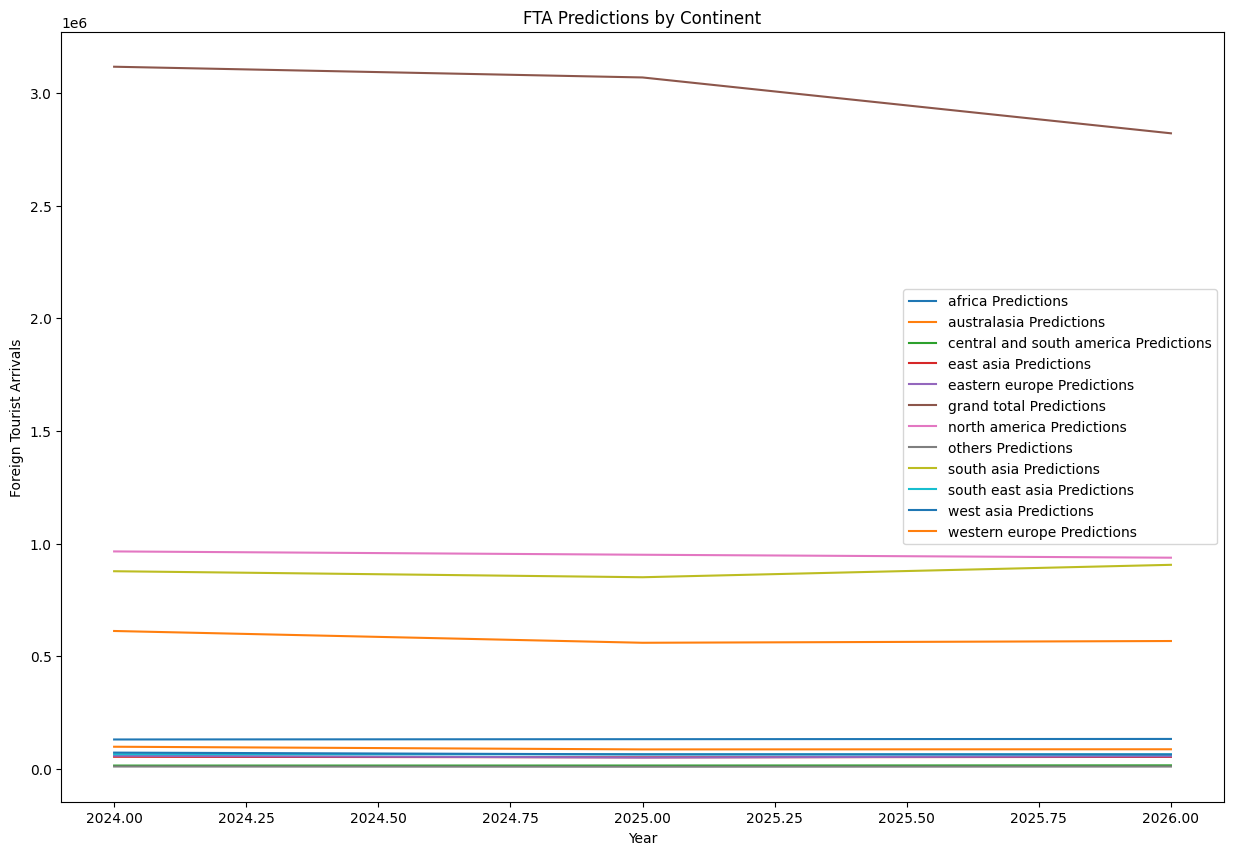

In [115]:
#visualising the predictions df
visualize_predictions(df_continent_yearly, predictions)

In [116]:
# Convert the dictionary to DataFrame
df_f = pd.concat(
    [pd.DataFrame(v).assign(Category=k) for k, v in predictions.items()],
    ignore_index=True
)

# Rename columns for more clarity
df_f = df_f.rename(columns={'Years': 'Year', 'Predictions': 'Predictions'})

# Reordering columns to proper readability
df_f = df_f[['Category', 'Year', 'Predictions']]

# Round off 'Predictions' column to 2 decimal places for proper FTA values display
df_f['Predictions'] = df_f['Predictions'].round(2)

# Display the first 15 rows of predictions
df_f.head(15)

,Category,Year,Predictions
0,africa,2024,131204.24
1,africa,2025,132474.24
2,africa,2026,133568.66
3,australasia,2024,98982.94
4,australasia,2025,87116.79
5,australasia,2026,87688.87
6,central and south america,2024,15395.49
7,central and south america,2025,15576.08
8,central and south america,2026,16345.34
9,east asia,2024,54399.55


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Predictions'].plot(kind='hist', bins=20, title='Predictions')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='Year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Year', y='Predictions', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Predictions']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Category')):
  _plot_series(series, series_name, i)
  fig.legend(title='Category', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Predictions')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Category')):
  _plot_series(series, series_name, i)
  fig.legend(title='Category', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Predictions']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Category')):
  _plot_series(series, series_name, i)
  fig.legend(title='Category', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Predictions')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Category')):
  _plot_series(series, series_name, i)
  fig.legend(title='Category', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_10['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Predictions'].plot(kind='line', figsize=(8, 4), title='Predictions')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['Category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='index', y='Category', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['Category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Year', y='Category', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['Category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='Predictions', y='Category', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

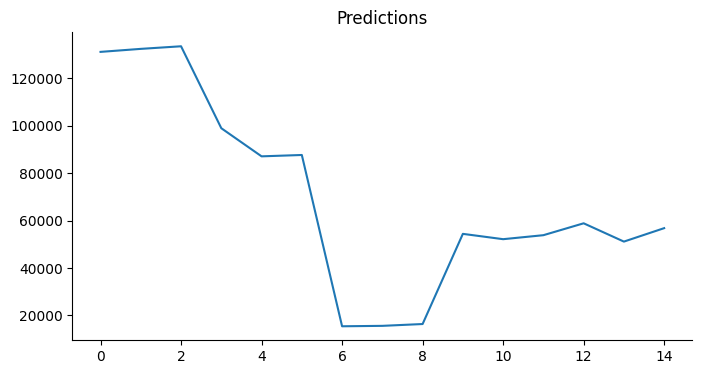

In [117]:
from matplotlib import pyplot as plt
_df_12['Predictions'].plot(kind='line', figsize=(8, 4), title='Predictions')
plt.gca().spines[['top', 'right']].set_visible(False)